In [1]:
# Importing necessary modules
import gc
import copy
import os
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from model_data_definitions import *
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
import os
import numpy as np

In [29]:
def modelNames():

    models = ["Linear Model",
              "Wide ReLU ANN",
              "Deep ReLU ANN", 
              "One Parameter"
    ]

    for partition_num in [1,2,4,8,10]:
        models.append(f"Spline ANN (z={partition_num})")
        models.append(f"Lookup Table (z={partition_num})")
        models.append(f"ABEL-Spline (z={partition_num})")

    return models

def modelNames():

    models = ["Wide ReLU ANN",
              "Deep ReLU ANN"             
             ]
    for partition_num in [1,2,4,8,10]: 
        models.append(f"ABEL-Spline (z={partition_num})")
        
    for partition_num in [10,8,4,2,1]: 
        models.append(f"Spline ANN (z={partition_num})")
    
    models.append("Linear Model")
        
    for partition_num in [1,2,4,8,10]: 
        models.append(f"Lookup Table (z={partition_num})")

    return models

model_names = modelNames()

print(model_names)

['Wide ReLU ANN', 'Deep ReLU ANN', 'ABEL-Spline (z=1)', 'ABEL-Spline (z=2)', 'ABEL-Spline (z=4)', 'ABEL-Spline (z=8)', 'ABEL-Spline (z=10)', 'Spline ANN (z=10)', 'Spline ANN (z=8)', 'Spline ANN (z=4)', 'Spline ANN (z=2)', 'Spline ANN (z=1)', 'Linear Model', 'Lookup Table (z=1)', 'Lookup Table (z=2)', 'Lookup Table (z=4)', 'Lookup Table (z=8)', 'Lookup Table (z=10)']


In [3]:
#np.save('data_dictionary_100_epochs_10_folds.npy', data)
data = np.load('data_dictionary_100_epochs_10_folds.npy', allow_pickle=True).item()

In [4]:
# Function to calculate mean and standard deviation of a metric for each fold for each model, over all datasets
def calculate_mean_std_metric(metric):
    # Initialize dictionary to hold means and standard deviations
    means_stds = {}

    # Iterate over datasets
    for dataset_name in data:
        # Iterate over models
        for model_name in data[dataset_name]:
            # Initialize list to hold metric values for this model
            metric_values = []

            # Iterate over folds
            for fold_number in data[dataset_name][model_name]:
                # Add metric value to list
                metric_values.append(data[dataset_name][model_name][fold_number][metric])

            # Calculate mean and standard deviation and add to dictionary
            mean_metric = np.mean(metric_values)
            std_metric = np.std(metric_values)
            
            if dataset_name not in means_stds:
                means_stds[dataset_name] = {}
                
            if model_name not in means_stds[dataset_name]:
                means_stds[dataset_name][model_name] = {}

            means_stds[dataset_name][model_name]['mean'] = mean_metric
            means_stds[dataset_name][model_name]['std'] = std_metric

    return means_stds

# Calculate mean and standard deviation of r_squared value for each fold for each model, over all datasets
mean_std_r_squared_values = calculate_mean_std_metric('r_squared_value')
#print(mean_std_r_squared_values)

# Calculate mean and standard deviation of test_error value for each fold for each model, over all datasets
mean_std_test_error_values = calculate_mean_std_metric('test_error')
#print(mean_std_test_error_values)

# Calculate mean and standard deviation of loss value for each fold for each model, over all datasets
mean_std_loss_values = calculate_mean_std_metric('loss')
#print(mean_std_loss_values)

In [5]:
mean_std_test_error_values['1027_ESL']['ABEL-Spline (z=4)']

{'mean': 0.1537955905837096, 'std': 0.03651069763983501}

In [6]:
filtered_datasets_metadata, datasets = fetch_return_filtered_pmlb_data_sets()
filtered_datasets_metadata

dataset  n_instances  n_features  \
0                         1027_ESL          488           4   
2                         1029_LEV         1000           4   
3                         1030_ERA         1000           4   
5             1096_FacultySalaries           50           4   
13                    192_vineyard           52           2   
23                     228_elusage           55           2   
25                 230_machine_cpu          209           6   
29         485_analcatdata_vehicle           48           4   
32                      519_vinnie          380           2   
34         523_analcatdata_neavote          100           2   
36                      529_pollen         3848           4   
40          556_analcatdata_apnea2          475           3   
41          557_analcatdata_apnea1          475           3   
48                579_fri_c0_250_5          250           5   
60                594_fri_c2_100_5          100           5   
62                596_fri_c2_250_5          250           5   
63                597_fri_c2_500_5          500           5   
65               599_fri_c2_1000_5         1000           5   
66                601_fri_c1_250_5          250           5   
74               609_fri_c0_1000_5         1000           5   
75                611_fri_c3_100_5          100           5   
76               612_fri_c1_1000_5         1000           5   
77                613_fri_c3_250_5          250           5   
80                617_fri_c3_500_5          500           5   
86                624_fri_c0_100_5          100           5   
89               628_fri_c3_1000_5         1000           5   
90                631_fri_c1_500_5          500           5   
102               649_fri_c0_500_5          500           5   
107               656_fri_c1_100_5          100           5   
111                   663_rabe_266          120           2   
112            665_sleuth_case2002          147           6   
114  678_visualizing_environmental          111           3   
115              687_sleuth_ex1605           62           5   
116         690_visualizing_galaxy          323           4   
118            706_sleuth_case1202           93           6   
119            712_chscase_geyser1          222           2   
155                         banana         5300           2   
270                        titanic         2201           3   

     n_binary_features  n_categorical_features  n_continuous_features  \
0                    0                       0                      4   
2                    0                       0                      4   
3                    0                       0                      4   
5                    0                       0                      4   
13                   0                       0                      2   
23                   0                       0                      2   
25                   0                       0                      6   
29                   0                       0                      4   
32                   0                       0                      2   
34                   0                       0                      2   
36                   0                       0                      4   
40                   0                       0                      3   
41                   0                       0                      3   
48                   0                       0                      5   
60                   0                       0                      5   
62                   0                       0                      5   
63                   0                       0                      5   
65                   0                       0                      5   
66                   0                       0                      5   
74                   0                       0                      5   
75                   0              

In [7]:
filtered_datasets_metadata.columns

Index(['dataset', 'n_instances', 'n_features', 'n_binary_features',
       'n_categorical_features', 'n_continuous_features', 'endpoint_type',
       'n_classes', 'imbalance', 'task'],
      dtype='object')

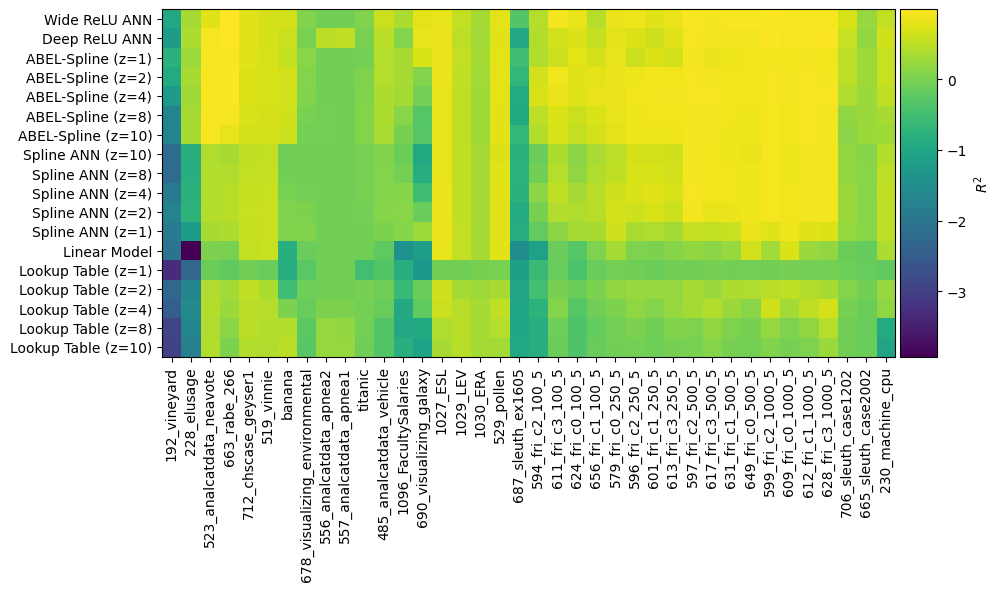

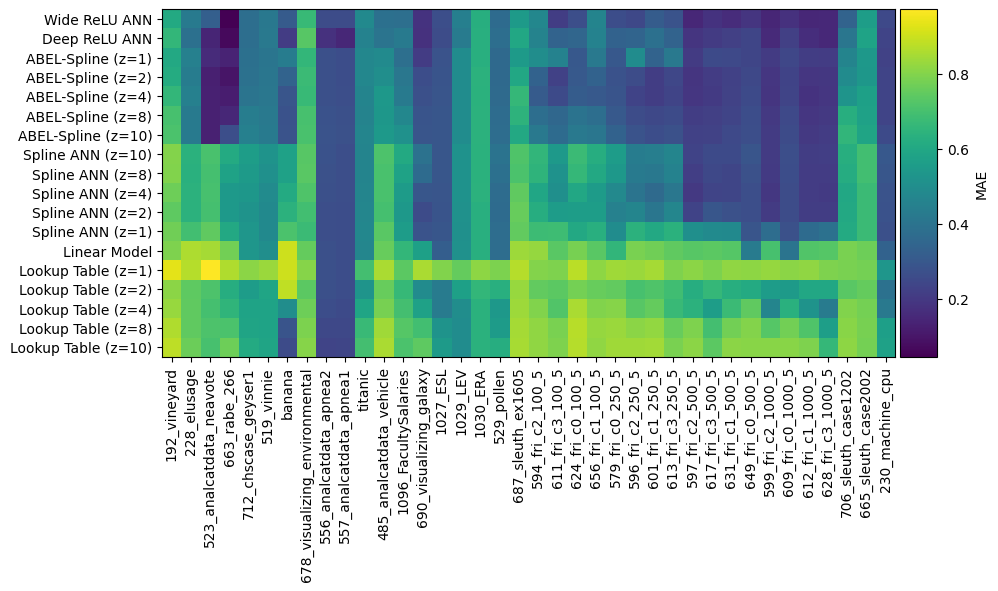

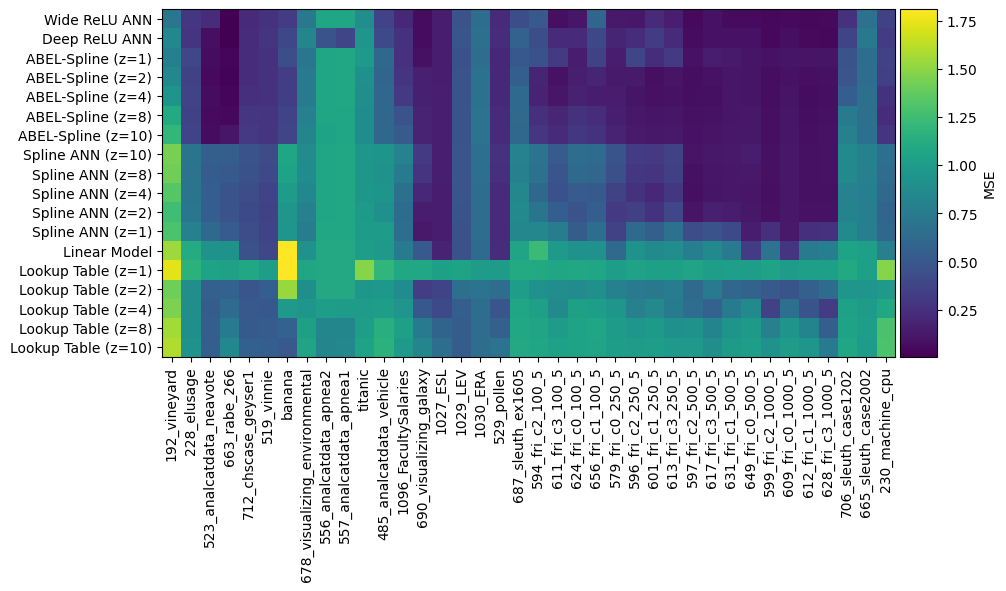

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Metrics labels dictionary
metrics_labels = {
    'loss': 'MAE',
    'r_squared_value': '$R^2$',
    'test_error': 'MSE'
}

def plot_metric(metric):
    # Create dictionaries mapping dataset names to number of instances and number of features
    instances_dict = filtered_datasets_metadata.set_index('dataset')['n_instances'].to_dict()
    features_dict = filtered_datasets_metadata.set_index('dataset')['n_features'].to_dict()

    # Get all unique feature counts
    unique_features_counts = sorted(list(set(features_dict.values())))

    # Initialize list to hold sorted dataset names
    sorted_dataset_names = []

    # Iterate over feature counts
    for feature_count in unique_features_counts:
        # Get datasets with current feature count and sort them based on number of instances
        datasets_with_feature_count = [dataset for dataset, features in features_dict.items() if features == feature_count]
        sorted_datasets = sorted(datasets_with_feature_count, key=lambda x: instances_dict[x])

        # Add to list of sorted dataset names
        sorted_dataset_names += sorted_datasets

    # Initialize 2D numpy array to hold data (r_squared value mean for this example)
    data_array = np.zeros((len(model_names), len(sorted_dataset_names)))    
    
    # Initialize 2D numpy array to hold data
    data_array = np.zeros((len(model_names), len(sorted_dataset_names)))
    
    mean_std_of_metric = calculate_mean_std_metric(metric)

    # Fill data array with metric means
    for i, model_name in enumerate(model_names):
        for j, dataset_name in enumerate(sorted_dataset_names):
            if model_name in mean_std_of_metric[dataset_name]:
                data_array[i, j] = mean_std_of_metric[dataset_name][model_name]['mean']

    # Create 2D imshow plot with colorbar
    fig, ax = plt.subplots(figsize=(10, len(model_names)/2))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    im = ax.imshow(data_array, interpolation='nearest', cmap='viridis')
    cbar = fig.colorbar(im, cax=cax, orientation="vertical")

    # Add label to colorbar using metrics labels dictionary
    cbar.set_label(metrics_labels[metric], rotation=90) 

    # Set model names as y tick labels
    ax.set_yticks(np.arange(len(model_names)))
    ax.set_yticklabels(model_names)

     # Set sorted dataset names as x tick labels, rotated 90 degrees for better readability
    ax.set_xticks(np.arange(len(sorted_dataset_names)))
    ax.set_xticklabels(sorted_dataset_names, rotation=90)

    # Show plot
    plt.show()

# Now you can call this function to plot different metrics
plot_metric('r_squared_value')
plot_metric('loss')
plot_metric('test_error')

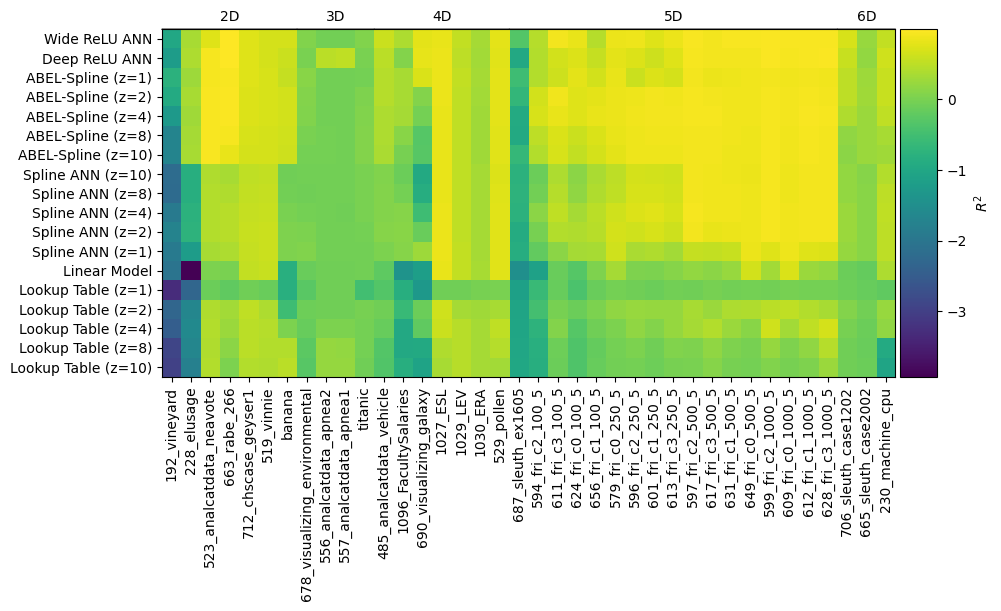

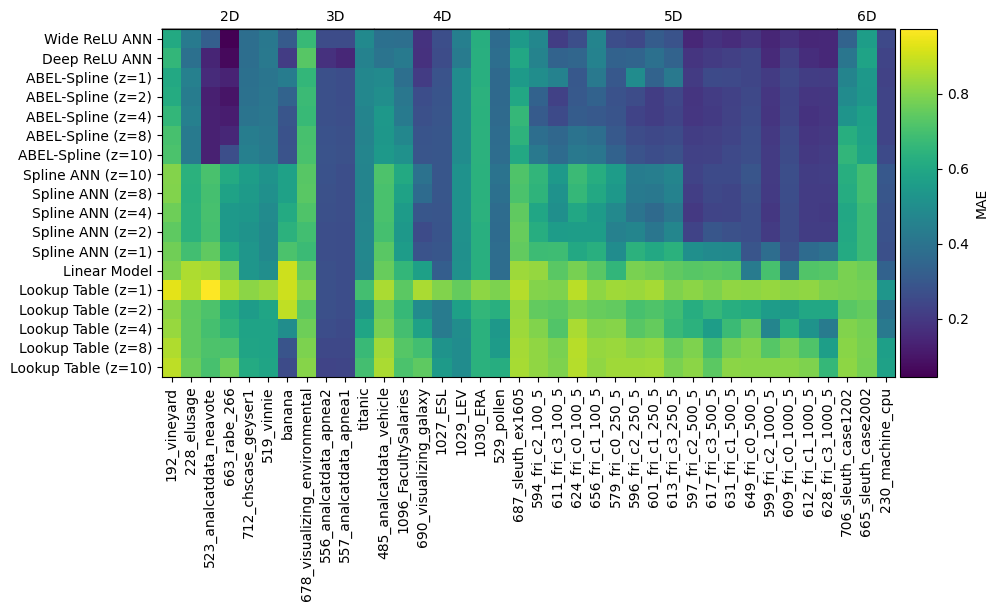

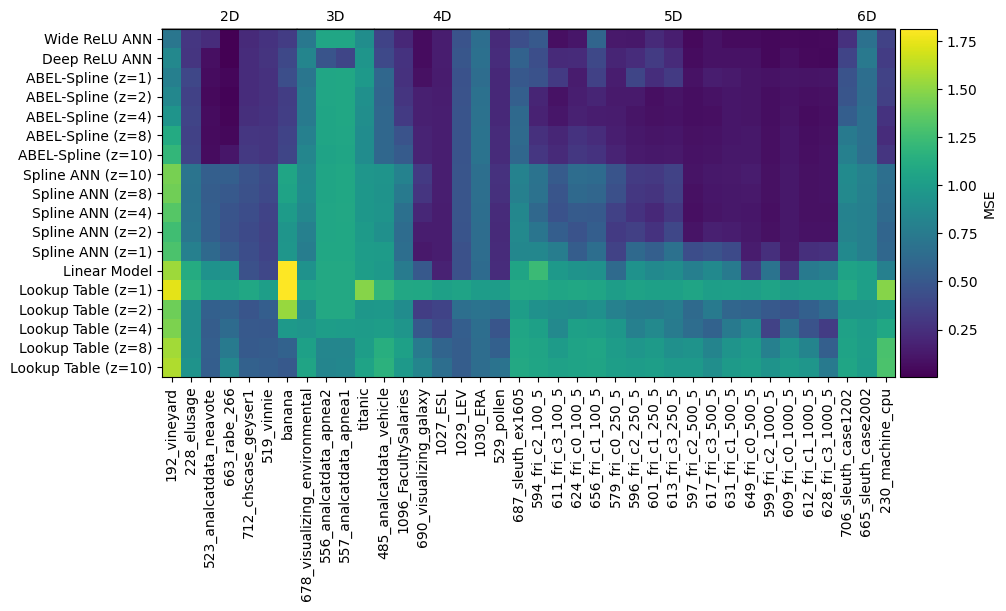

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Metrics labels dictionary
metrics_labels = {
    'loss': 'MAE',
    'r_squared_value': '$R^2$',
    'test_error': 'MSE'
}

def plot_metric(metric):
    # Create dictionaries mapping dataset names to number of instances and number of features
    instances_dict = filtered_datasets_metadata.set_index('dataset')['n_instances'].to_dict()
    features_dict = filtered_datasets_metadata.set_index('dataset')['n_features'].to_dict()

    # Get all unique feature counts
    unique_features_counts = sorted(list(set(features_dict.values())))

    # Initialize list and dictionary to hold sorted dataset names and their indices for bracket positioning
    sorted_dataset_names = []
    bracket_positions = {}

    # Iterate over feature counts
    for feature_count in unique_features_counts:
        # Get datasets with current feature count and sort them based on number of instances
        datasets_with_feature_count = [dataset for dataset, features in features_dict.items() if features == feature_count]
        sorted_datasets = sorted(datasets_with_feature_count, key=lambda x: instances_dict[x])

        if not sorted_datasets:
            continue
        
        # Add to list of sorted dataset names and store their indices in the dictionary for bracket positioning
        start_index = len(sorted_dataset_names)
        end_index = start_index + len(sorted_datasets) - 1

        bracket_positions[feature_count] = (start_index, end_index)
        
        sorted_dataset_names += sorted_datasets
    
    # Initialize 2D numpy array to hold data (r_squared value mean for this example)
    data_array = np.zeros((len(model_names), len(sorted_dataset_names)))    

    mean_std_of_metric = calculate_mean_std_metric(metric)

    # Fill data array with metric means
    for i, model_name in enumerate(model_names):
        for j, dataset_name in enumerate(sorted_dataset_names):
            if model_name in mean_std_of_metric[dataset_name]:
                data_array[i, j] = mean_std_of_metric[dataset_name][model_name]['mean']

    # Create 2D imshow plot with colorbar
    fig, ax = plt.subplots(figsize=(10, len(model_names)/2))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    im = ax.imshow(data_array, interpolation='nearest', cmap='viridis')
    cbar = fig.colorbar(im, cax=cax, orientation="vertical")

     # Add label to colorbar using metrics labels dictionary
    cbar.set_label(metrics_labels[metric], rotation=90) 

     # Set model names as y tick labels
    ax.set_yticks(np.arange(len(model_names)))
    ax.set_yticklabels(model_names)

      # Set sorted dataset names as x tick labels, rotated 90 degrees for better readability
    ax.set_xticks(np.arange(len(sorted_dataset_names)))
    ax.set_xticklabels(sorted_dataset_names, rotation=90)

      # Add brackets and labels indicating feature counts
    for feature_count, (start_index, end_index) in bracket_positions.items():
        ax.annotate("", xy=(start_index-0.5,-0.5), xycoords='data',
                      xytext=(end_index+0.5,-0.5), textcoords='data',
                      annotation_clip=False,
                      arrowprops=dict(arrowstyle="-",
                                      shrinkA=0, shrinkB=0,
                                      connectionstyle="angle3"))
        ax.text((start_index+end_index)/2, -1.5, f"{feature_count}D",
                  horizontalalignment='center', verticalalignment='top')

    # Show plot
    plt.show()

# Now you can call this function to plot different metrics
plot_metric('r_squared_value')
plot_metric('loss')
plot_metric('test_error')

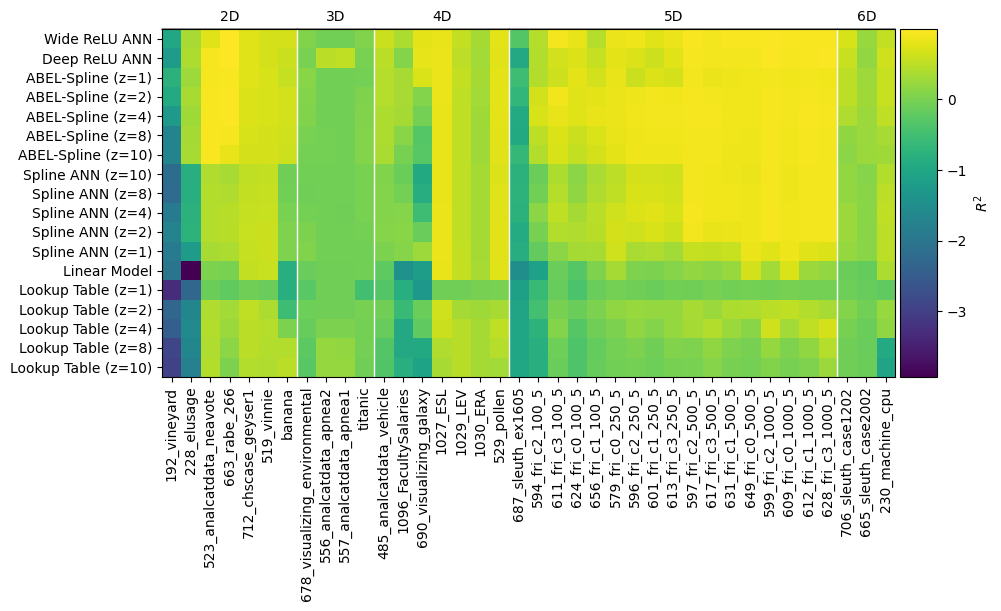

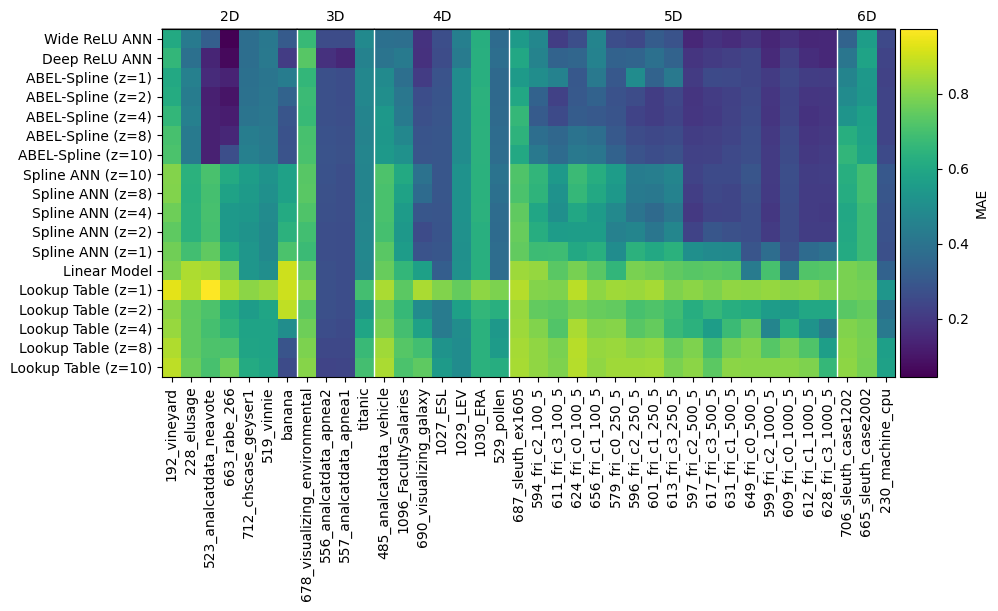

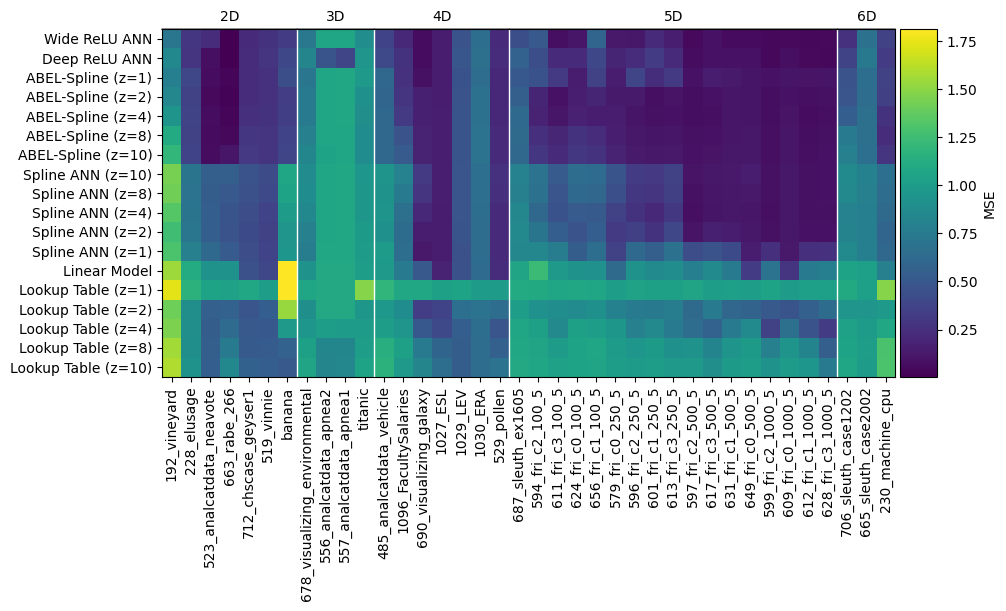

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Metrics labels dictionary
metrics_labels = {
    'loss': 'MAE',
    'r_squared_value': '$R^2$',
    'test_error': 'MSE'
}

def plot_metric(metric):
    # Create dictionaries mapping dataset names to number of instances and number of features
    instances_dict = filtered_datasets_metadata.set_index('dataset')['n_instances'].to_dict()
    features_dict = filtered_datasets_metadata.set_index('dataset')['n_features'].to_dict()

    # Get all unique feature counts
    unique_features_counts = sorted(list(set(features_dict.values())))

    # Initialize list and dictionary to hold sorted dataset names and their indices for bracket positioning
    sorted_dataset_names = []
    bracket_positions = {}

     # Iterate over feature counts
    for feature_count in unique_features_counts:
         # Get datasets with current feature count and sort them based on number of instances
        datasets_with_feature_count = [dataset for dataset, features in features_dict.items() if features == feature_count]
        sorted_datasets = sorted(datasets_with_feature_count, key=lambda x: instances_dict[x])

        if not sorted_datasets:
            continue
        
         # Add to list of sorted dataset names and store their indices in the dictionary for bracket positioning
        start_index = len(sorted_dataset_names)
        end_index = start_index + len(sorted_datasets) - 1

        bracket_positions[feature_count] = (start_index, end_index)
        
        sorted_dataset_names += sorted_datasets
    
     # Initialize 2D numpy array to hold data (r_squared value mean for this example)
    data_array = np.zeros((len(model_names), len(sorted_dataset_names)))    

    mean_std_of_metric = calculate_mean_std_metric(metric)

     # Fill data array with metric means
    for i, model_name in enumerate(model_names):
        for j, dataset_name in enumerate(sorted_dataset_names):
            if model_name in mean_std_of_metric[dataset_name]:
                data_array[i, j] = mean_std_of_metric[dataset_name][model_name]['mean']

     # Create 2D imshow plot with colorbar
    fig, ax = plt.subplots(figsize=(10, len(model_names)/2))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    im = ax.imshow(data_array, interpolation='nearest', cmap='viridis')
    cbar = fig.colorbar(im, cax=cax, orientation="vertical")

      # Add label to colorbar using metrics labels dictionary
    cbar.set_label(metrics_labels[metric], rotation=90) 

      # Set model names as y tick labels
    ax.set_yticks(np.arange(len(model_names)))
    ax.set_yticklabels(model_names)

       # Set sorted dataset names as x tick labels, rotated 90 degrees for better readability
    ax.set_xticks(np.arange(len(sorted_dataset_names)))
    ax.set_xticklabels(sorted_dataset_names, rotation=90)

       # Add brackets and labels indicating feature counts
    for feature_count, (start_index, end_index) in bracket_positions.items():
        ax.annotate("", xy=(start_index-0.5,-0.5), xycoords='data',
                      xytext=(end_index+0.5,-0.5), textcoords='data',
                      annotation_clip=False,
                      arrowprops=dict(arrowstyle="-",
                                      shrinkA=0, shrinkB=0,
                                      connectionstyle="angle3"))
        ax.text((start_index+end_index)/2, -1.5, f"{feature_count}D",
                  horizontalalignment='center', verticalalignment='top')

        # Draw vertical white lines at the boundary between datasets with different feature counts
        if start_index > 0:
            ax.axvline(x=start_index-0.5, color='white', linewidth=1)

    # Show plot
    plt.show()

# Now you can call this function to plot different metrics
plot_metric('r_squared_value')
plot_metric('loss')
plot_metric('test_error')

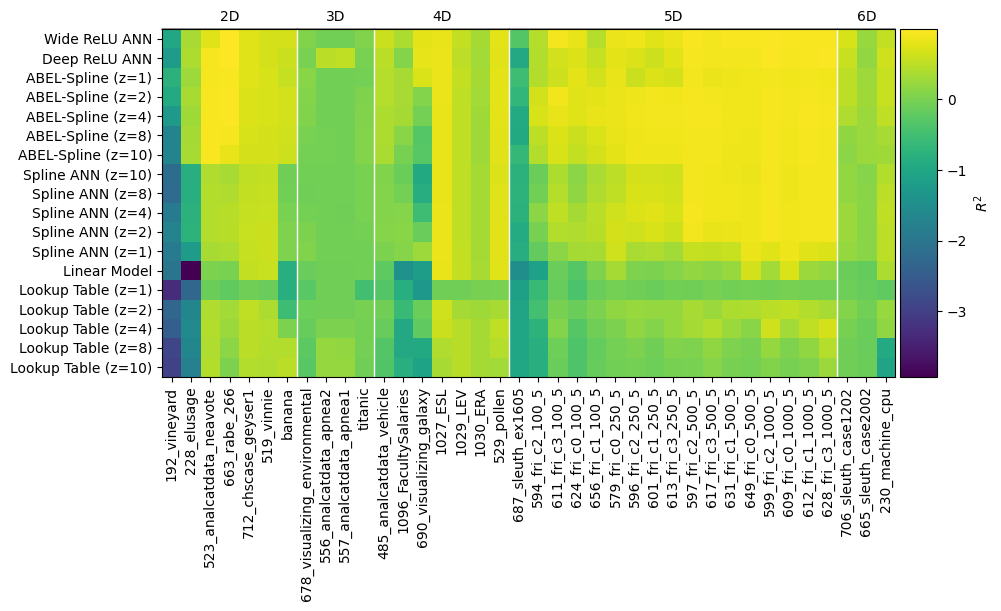

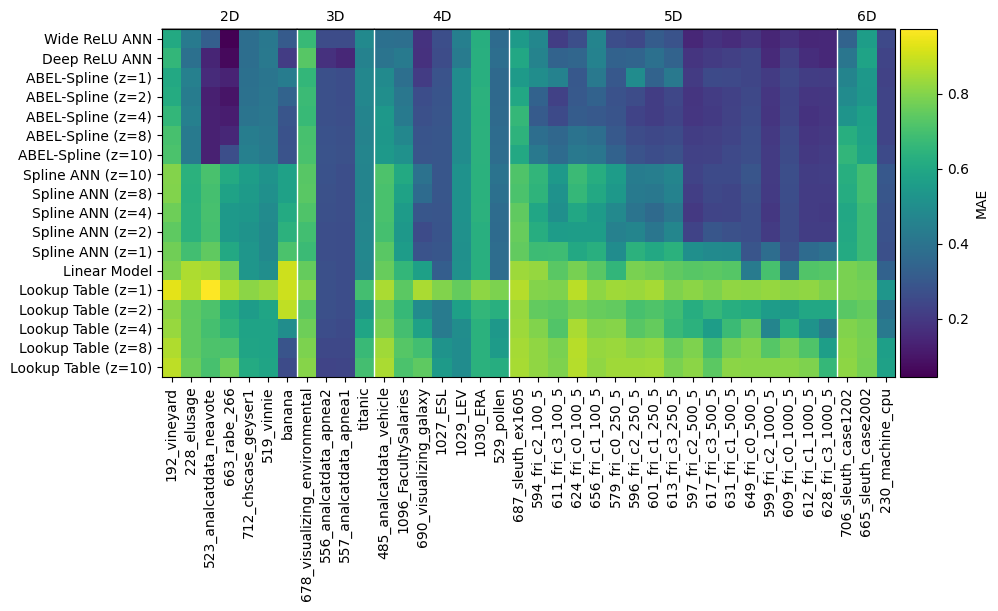

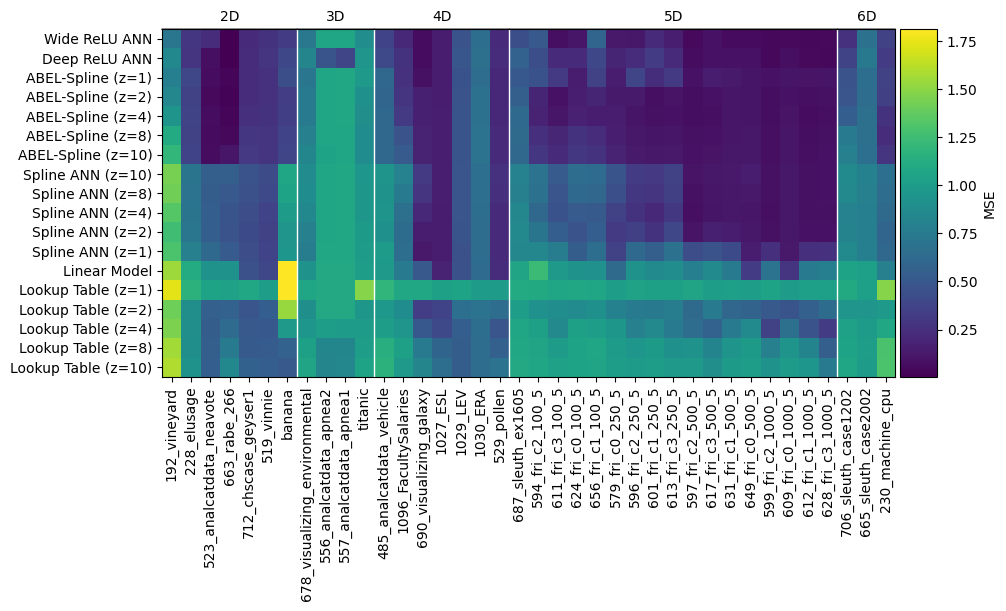

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Metrics labels dictionary
metrics_labels = {
    'loss': 'MAE',
    'r_squared_value': '$R^2$',
    'test_error': 'MSE'
}

def plot_metric(metric):
    # Create dictionaries mapping dataset names to number of instances and number of features
    instances_dict = filtered_datasets_metadata.set_index('dataset')['n_instances'].to_dict()
    features_dict = filtered_datasets_metadata.set_index('dataset')['n_features'].to_dict()

    # Get all unique feature counts
    unique_features_counts = sorted(list(set(features_dict.values())))

    # Initialize list and dictionary to hold sorted dataset names and their indices for bracket positioning
    sorted_dataset_names = []
    bracket_positions = {}

     # Iterate over feature counts
    for feature_count in unique_features_counts:
         # Get datasets with current feature count and sort them based on number of instances
        datasets_with_feature_count = [dataset for dataset, features in features_dict.items() if features == feature_count]
        sorted_datasets = sorted(datasets_with_feature_count, key=lambda x: instances_dict[x])

        if not sorted_datasets:
            continue
        
         # Add to list of sorted dataset names and store their indices in the dictionary for bracket positioning
        start_index = len(sorted_dataset_names)
        end_index = start_index + len(sorted_datasets) - 1

        bracket_positions[feature_count] = (start_index, end_index)
        
        sorted_dataset_names += sorted_datasets
    
     # Initialize 2D numpy array to hold data (r_squared value mean for this example)
    data_array = np.zeros((len(model_names), len(sorted_dataset_names)))    

    mean_std_of_metric = calculate_mean_std_metric(metric)

     # Fill data array with metric means
    for i, model_name in enumerate(model_names):
        for j, dataset_name in enumerate(sorted_dataset_names):
            if model_name in mean_std_of_metric[dataset_name]:
                data_array[i, j] = mean_std_of_metric[dataset_name][model_name]['mean']

     # Create 2D imshow plot with colorbar
    fig, ax = plt.subplots(figsize=(10, len(model_names)/2))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    im = ax.imshow(data_array, interpolation='nearest', cmap='viridis')
    cbar = fig.colorbar(im, cax=cax, orientation="vertical")

      # Add label to colorbar using metrics labels dictionary
    cbar.set_label(metrics_labels[metric], rotation=90) 

      # Set model names as y tick labels
    ax.set_yticks(np.arange(len(model_names)))
    ax.set_yticklabels(model_names)

       # Set sorted dataset names as x tick labels, rotated 90 degrees for better readability
    ax.set_xticks(np.arange(len(sorted_dataset_names)))
    ax.set_xticklabels(sorted_dataset_names, rotation=90)

       # Add brackets and labels indicating feature counts
    for feature_count, (start_index, end_index) in bracket_positions.items():
        ax.annotate("", xy=(start_index-0.5,-0.5), xycoords='data',
                      xytext=(end_index+0.5,-0.5), textcoords='data',
                      annotation_clip=False,
                      arrowprops=dict(arrowstyle="-",
                                      shrinkA=0, shrinkB=0,
                                      connectionstyle="angle3"))
        ax.text((start_index+end_index)/2, -1.5, f"{feature_count}D",
                  horizontalalignment='center', verticalalignment='top')

        # Draw vertical white lines at the boundary between datasets with different feature counts
        if start_index > 0:
            ax.axvline(x=start_index-0.5, color='white', linewidth=1)

    # Show plot
    plt.show()

# Now you can call this function to plot different metrics
plot_metric('r_squared_value')
plot_metric('loss')
plot_metric('test_error')

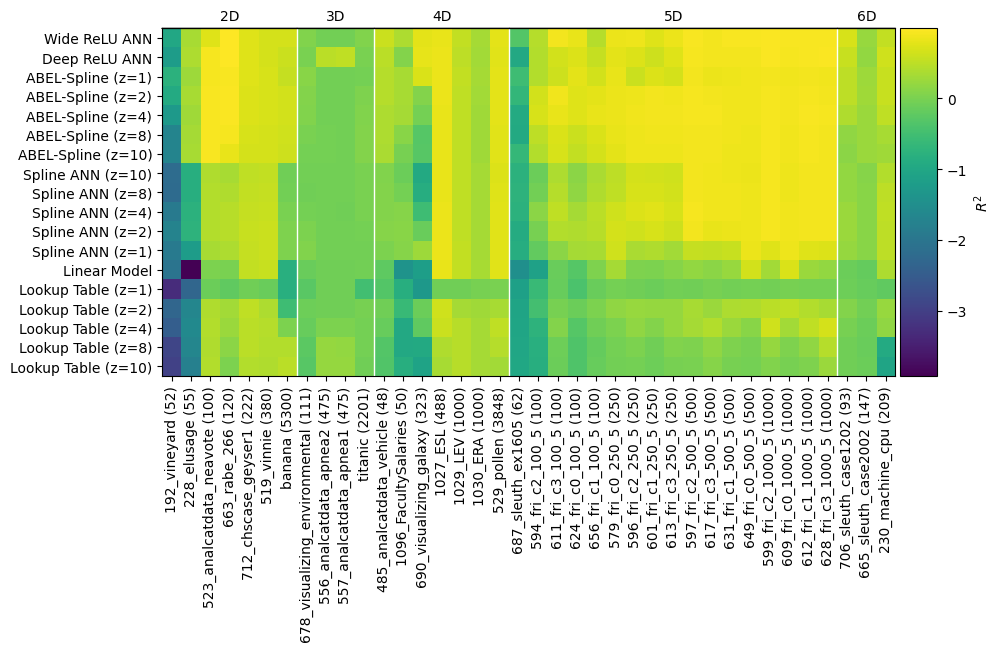

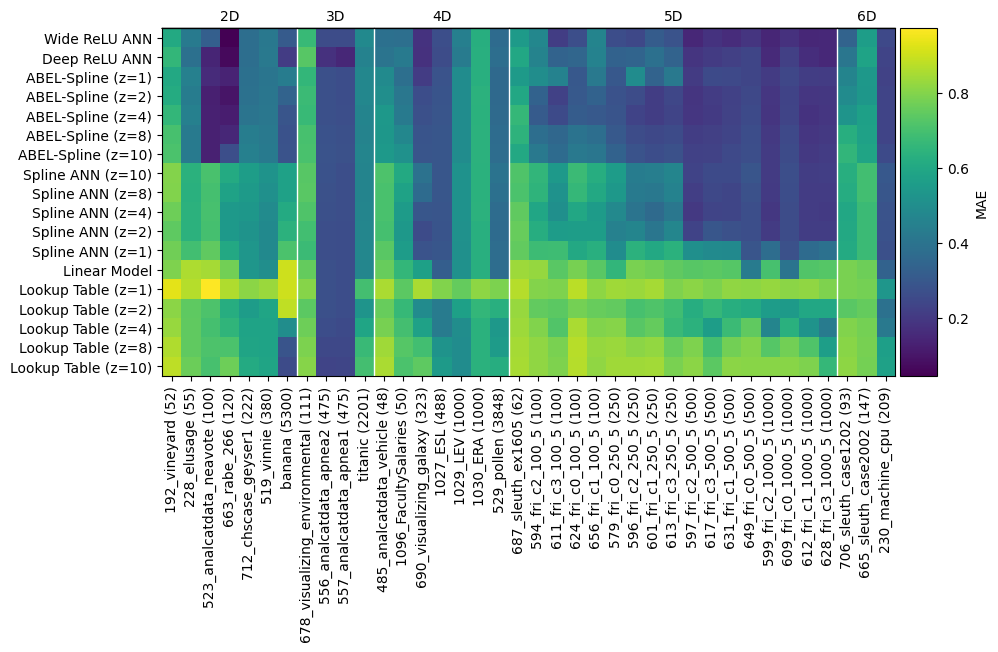

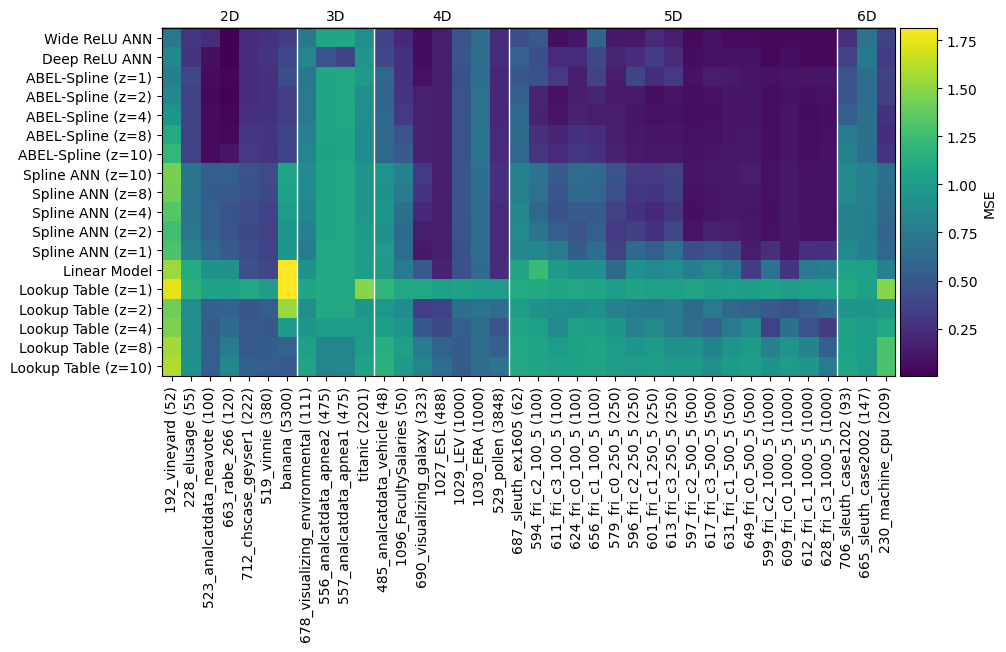

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Metrics labels dictionary
metrics_labels = {
    'loss': 'MAE',
    'r_squared_value': '$R^2$',
    'test_error': 'MSE'
}

def plot_metric(metric):
    # Create dictionaries mapping dataset names to number of instances and number of features
    instances_dict = filtered_datasets_metadata.set_index('dataset')['n_instances'].to_dict()
    features_dict = filtered_datasets_metadata.set_index('dataset')['n_features'].to_dict()

    # Get all unique feature counts
    unique_features_counts = sorted(list(set(features_dict.values())))

    # Initialize list and dictionary to hold sorted dataset names and their indices for bracket positioning
    sorted_dataset_names = []
    bracket_positions = {}

     # Iterate over feature counts
    for feature_count in unique_features_counts:
         # Get datasets with current feature count and sort them based on number of instances
        datasets_with_feature_count = [dataset for dataset, features in features_dict.items() if features == feature_count]
        sorted_datasets = sorted(datasets_with_feature_count, key=lambda x: instances_dict[x])

        if not sorted_datasets:
            continue
        
         # Add to list of sorted dataset names and store their indices in the dictionary for bracket positioning
        start_index = len(sorted_dataset_names)
        end_index = start_index + len(sorted_datasets) - 1

        bracket_positions[feature_count] = (start_index, end_index)
        
        sorted_dataset_names += [(dataset, instances_dict[dataset]) for dataset in sorted_datasets]

     # Initialize 2D numpy array to hold data (r_squared value mean for this example)
    data_array = np.zeros((len(model_names), len(sorted_dataset_names)))    

    mean_std_of_metric = calculate_mean_std_metric(metric)

     # Fill data array with metric means
    for i, model_name in enumerate(model_names):
        for j, (dataset_name, _) in enumerate(sorted_dataset_names):
            if model_name in mean_std_of_metric[dataset_name]:
                data_array[i, j] = mean_std_of_metric[dataset_name][model_name]['mean']

     # Create 2D imshow plot with colorbar
    fig, ax = plt.subplots(figsize=(10, len(model_names)/2))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    im = ax.imshow(data_array, interpolation='nearest', cmap='viridis')
    cbar = fig.colorbar(im, cax=cax, orientation="vertical")

      # Add label to colorbar using metrics labels dictionary
    cbar.set_label(metrics_labels[metric], rotation=90) 

      # Set model names as y tick labels
    ax.set_yticks(np.arange(len(model_names)))
    ax.set_yticklabels(model_names)

       # Set sorted dataset names as x tick labels and include number of instances, rotated 90 degrees for better readability
    ax.set_xticks(np.arange(len(sorted_dataset_names)))
    ax.set_xticklabels([f"{name} ({n_instances})" for name, n_instances in sorted_dataset_names], rotation=90)

       # Add brackets and labels indicating feature counts
    for feature_count, (start_index, end_index) in bracket_positions.items():
        ax.annotate("", xy=(start_index-0.5,-0.5), xycoords='data',
                      xytext=(end_index+0.5,-0.5), textcoords='data',
                      annotation_clip=False,
                      arrowprops=dict(arrowstyle="-",
                                      shrinkA=0, shrinkB=0,
                                      connectionstyle="angle3"))
        ax.text((start_index+end_index)/2, -1.5, f"{feature_count}D",
                  horizontalalignment='center', verticalalignment='top')

        # Draw vertical white lines at the boundary between datasets with different feature counts
        if start_index > 0:
            ax.axvline(x=start_index-0.5, color='white', linewidth=1)

    # Show plot
    plt.show()

# Now you can call this function to plot different metrics
plot_metric('r_squared_value')
plot_metric('loss')
plot_metric('test_error')

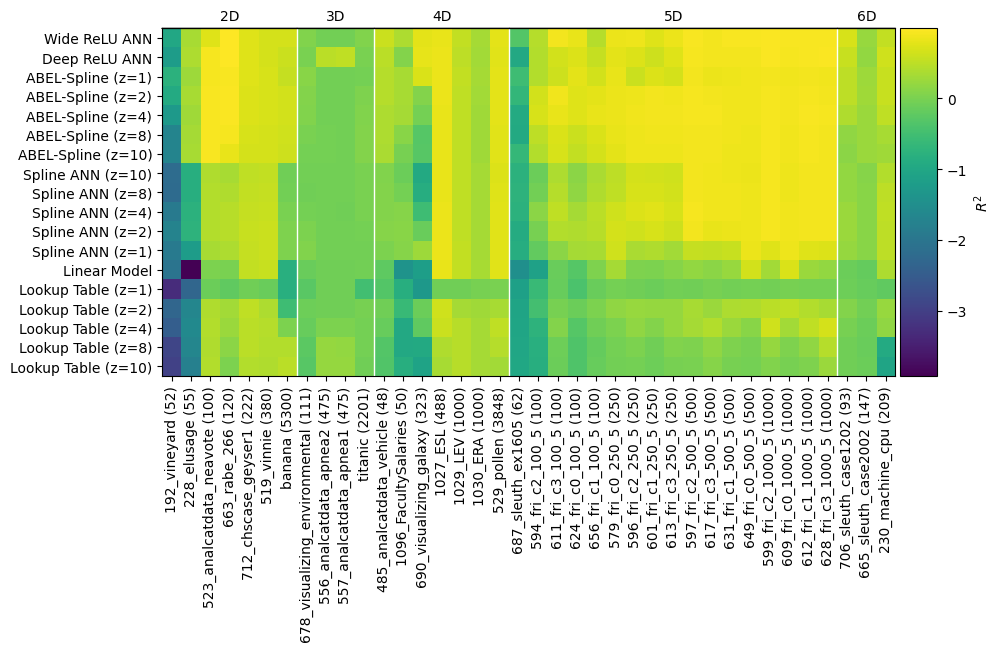

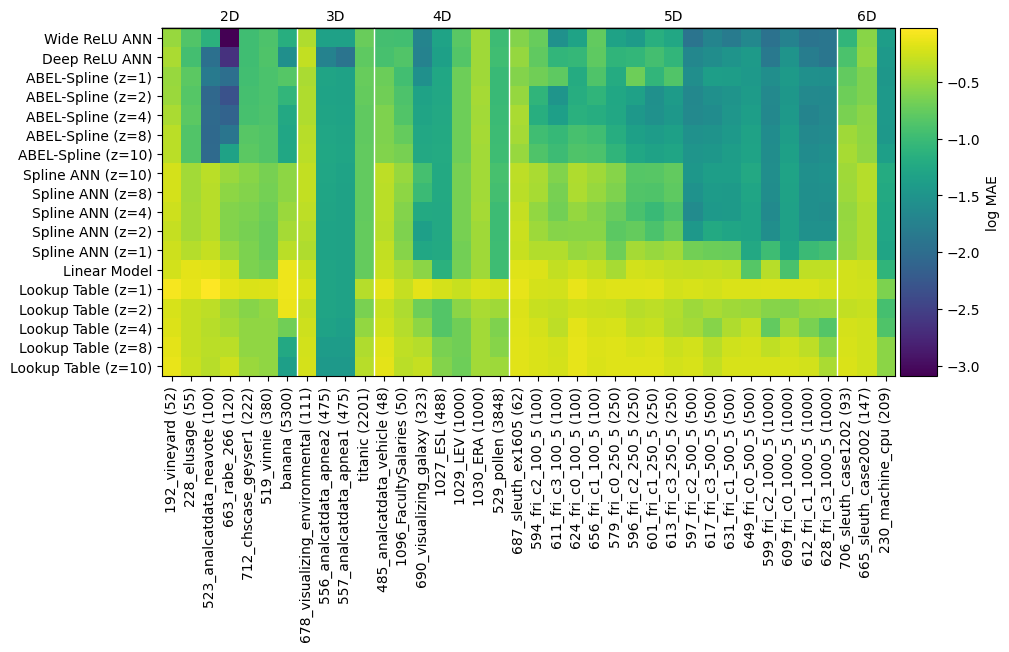

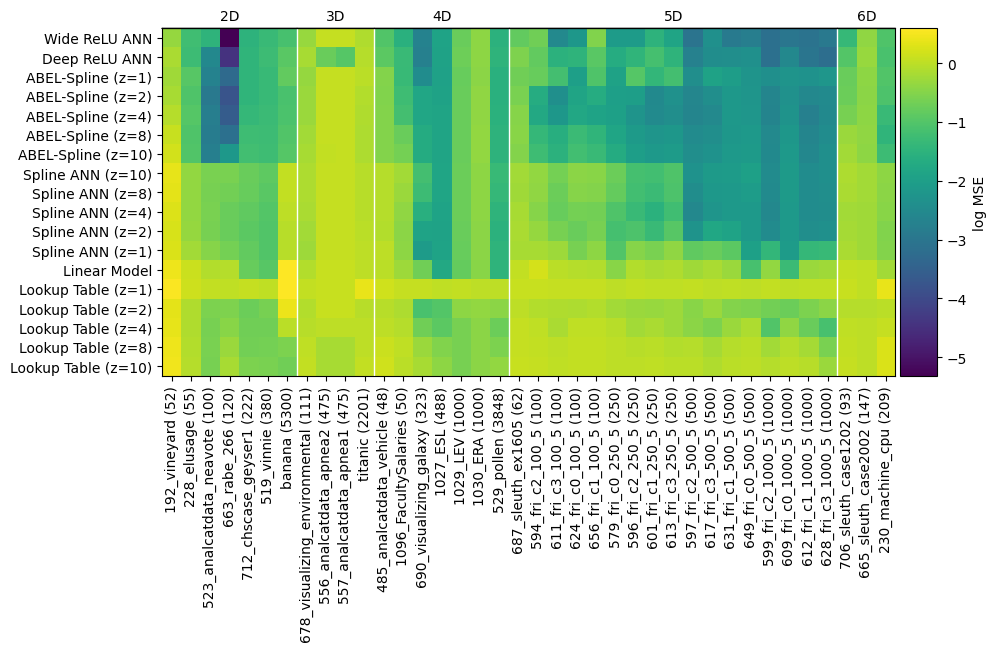

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Metrics labels dictionary
metrics_labels = {
    'loss': 'log MAE',
    'r_squared_value': '$R^2$',
    'test_error': 'log MSE'
}

def plot_metric(metric):
    # Create dictionaries mapping dataset names to number of instances and number of features
    instances_dict = filtered_datasets_metadata.set_index('dataset')['n_instances'].to_dict()
    features_dict = filtered_datasets_metadata.set_index('dataset')['n_features'].to_dict()

    # Get all unique feature counts
    unique_features_counts = sorted(list(set(features_dict.values())))

    # Initialize list and dictionary to hold sorted dataset names and their indices for bracket positioning
    sorted_dataset_names = []
    bracket_positions = {}

     # Iterate over feature counts
    for feature_count in unique_features_counts:
         # Get datasets with current feature count and sort them based on number of instances
        datasets_with_feature_count = [dataset for dataset, features in features_dict.items() if features == feature_count]
        sorted_datasets = sorted(datasets_with_feature_count, key=lambda x: instances_dict[x])

        if not sorted_datasets:
            continue
        
         # Add to list of sorted dataset names and store their indices in the dictionary for bracket positioning
        start_index = len(sorted_dataset_names)
        end_index = start_index + len(sorted_datasets) - 1

        bracket_positions[feature_count] = (start_index, end_index)
        
        sorted_dataset_names += [(dataset, instances_dict[dataset]) for dataset in sorted_datasets]

     # Initialize 2D numpy array to hold data (r_squared value mean for this example)
    data_array = np.zeros((len(model_names), len(sorted_dataset_names)))    

    mean_std_of_metric = calculate_mean_std_metric(metric)

     # Fill data array with metric means
    for i, model_name in enumerate(model_names):
        for j, (dataset_name, _) in enumerate(sorted_dataset_names):
            if model_name in mean_std_of_metric[dataset_name]:
                if metric == 'r_squared_value':
                    data_array[i, j] = mean_std_of_metric[dataset_name][model_name]['mean']
                else:
                    data_array[i, j] = np.log(mean_std_of_metric[dataset_name][model_name]['mean'])

     # Create 2D imshow plot with colorbar
    fig, ax = plt.subplots(figsize=(10, len(model_names)/2))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    im = ax.imshow(data_array, interpolation='nearest', cmap='viridis')
    cbar = fig.colorbar(im, cax=cax, orientation="vertical")

      # Add label to colorbar using metrics labels dictionary
    cbar.set_label(metrics_labels[metric], rotation=90) 

      # Set model names as y tick labels
    ax.set_yticks(np.arange(len(model_names)))
    ax.set_yticklabels(model_names)

       # Set sorted dataset names as x tick labels and include number of instances, rotated 90 degrees for better readability
    ax.set_xticks(np.arange(len(sorted_dataset_names)))
    ax.set_xticklabels([f"{name} ({n_instances})" for name, n_instances in sorted_dataset_names], rotation=90)

       # Add brackets and labels indicating feature counts
    for feature_count, (start_index, end_index) in bracket_positions.items():
        ax.annotate("", xy=(start_index-0.5,-0.5), xycoords='data',
                      xytext=(end_index+0.5,-0.5), textcoords='data',
                      annotation_clip=False,
                      arrowprops=dict(arrowstyle="-",
                                      shrinkA=0, shrinkB=0,
                                      connectionstyle="angle3"))
        ax.text((start_index+end_index)/2, -1.5, f"{feature_count}D",
                  horizontalalignment='center', verticalalignment='top')

        # Draw vertical white lines at the boundary between datasets with different feature counts
        if start_index > 0:
            ax.axvline(x=start_index-0.5, color='white', linewidth=1)

    # Show plot
    plt.show()

# Now you can call this function to plot different metrics
plot_metric('r_squared_value')
plot_metric('loss')
plot_metric('test_error')

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Metrics labels dictionary
metrics_labels = {
    'loss': 'log MAE',
    'r_squared_value': '$R^2$',
    'test_error': 'log MSE'
}

def plot_metric(metric):
    instances_dict = filtered_datasets_metadata.set_index('dataset')['n_instances'].to_dict()
    features_dict = filtered_datasets_metadata.set_index('dataset')['n_features'].to_dict()

    unique_features_counts = sorted(list(set(features_dict.values())))

    sorted_dataset_names = []
    bracket_positions = {}

    for feature_count in unique_features_counts:
        datasets_with_feature_count = [dataset for dataset, features in features_dict.items() if features == feature_count]
        sorted_datasets = sorted(datasets_with_feature_count, key=lambda x: instances_dict[x])

        if not sorted_datasets:
            continue

        start_index = len(sorted_dataset_names)
        end_index = start_index + len(sorted_datasets) - 1

        bracket_positions[feature_count] = (start_index, end_index)
        
        sorted_dataset_names += [(dataset, instances_dict[dataset]) for dataset in sorted_datasets]

    data_array = np.zeros((len(model_names), len(sorted_dataset_names)))    

    mean_std_of_metric = calculate_mean_std_metric(metric)

    for i, model_name in enumerate(model_names):
        for j, (dataset_name, _) in enumerate(sorted_dataset_names):
            if model_name in mean_std_of_metric[dataset_name]:
                if metric == 'r_squared_value':
                    data_array[i, j] = mean_std_of_metric[dataset_name][model_name]['mean']
                else:
                    data_array[i, j] = np.log(mean_std_of_metric[dataset_name][model_name]['mean'])

    fig, ax = plt.subplots(figsize=(10, len(model_names)/2))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    cmap_choice = 'RdBu_r' if metric == 'r_squared_value' else 'viridis'
    im = ax.imshow(data_array, interpolation='nearest', cmap=cmap_choice)
    cbar = fig.colorbar(im, cax=cax, orientation="vertical")

    cbar.set_label(metrics_labels[metric], rotation=90) 

    ax.set_yticks(np.arange(len(model_names)))
    ax.set_yticklabels(model_names)

    ax.set_xticks(np.arange(len(sorted_dataset_names)))
    ax.set_xticklabels([f"{name} ({n_instances})" for name, n_instances in sorted_dataset_names], rotation=90)

    for feature_count, (start_index, end_index) in bracket_positions.items():
        ax.annotate("", xy=(start_index-0.5,-0.5), xycoords='data',
                      xytext=(end_index+0.5,-0.5), textcoords='data',
                      annotation_clip=False,
                      arrowprops=dict(arrowstyle="-",
                                      shrinkA=0, shrinkB=0,
                                      connectionstyle="angle3"))
        ax.text((start_index+end_index)/2, -1.5, f"{feature_count}D",
                  horizontalalignment='center', verticalalignment='top')

        if start_index > 0:
            ax.axvline(x=start_index-0.5, color='white', linewidth=1)

    plt.savefig(f'{metric}.png', dpi=300, bbox_inches='tight')
    plt.close(fig)  # close the figure

# Now you can call this function to plot different metrics
plot_metric('r_squared_value')
plot_metric('loss')
plot_metric('test_error')

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import TwoSlopeNorm

# Metrics labels dictionary
metrics_labels = {
    'loss': 'log MAE',
    'r_squared_value': '$R^2$',
    'test_error': 'log MSE'
}

def plot_metric(metric):
    instances_dict = filtered_datasets_metadata.set_index('dataset')['n_instances'].to_dict()
    features_dict = filtered_datasets_metadata.set_index('dataset')['n_features'].to_dict()

    unique_features_counts = sorted(list(set(features_dict.values())))

    sorted_dataset_names = []
    bracket_positions = {}

    for feature_count in unique_features_counts:
        datasets_with_feature_count = [dataset for dataset, features in features_dict.items() if features == feature_count]
        sorted_datasets = sorted(datasets_with_feature_count, key=lambda x: instances_dict[x])

        if not sorted_datasets:
            continue

        start_index = len(sorted_dataset_names)
        end_index = start_index + len(sorted_datasets) - 1

        bracket_positions[feature_count] = (start_index, end_index)
        
        sorted_dataset_names += [(dataset, instances_dict[dataset]) for dataset in sorted_datasets]

    data_array = np.zeros((len(model_names), len(sorted_dataset_names)))    

    mean_std_of_metric = calculate_mean_std_metric(metric)

    for i, model_name in enumerate(model_names):
        for j, (dataset_name, _) in enumerate(sorted_dataset_names):
            if model_name in mean_std_of_metric[dataset_name]:
                if metric == 'r_squared_value':
                    data_array[i, j] = mean_std_of_metric[dataset_name][model_name]['mean']
                else:
                    data_array[i, j] = np.log(mean_std_of_metric[dataset_name][model_name]['mean'])

    fig, ax = plt.subplots(figsize=(10, len(model_names)/2))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    cmap_choice = 'RdBu_r' if metric == 'r_squared_value' else 'viridis'
    
    if metric == 'r_squared_value':
        norm = TwoSlopeNorm(vmin=data_array.min(), vcenter=0, vmax=data_array.max())
        im = ax.imshow(data_array, interpolation='nearest', cmap=cmap_choice, norm=norm)
    else:
        im = ax.imshow(data_array, interpolation='nearest', cmap=cmap_choice)

    cbar = fig.colorbar(im, cax=cax, orientation="vertical")

    cbar.set_label(metrics_labels[metric], rotation=90) 

    ax.set_yticks(np.arange(len(model_names)))
    ax.set_yticklabels(model_names)

    ax.set_xticks(np.arange(len(sorted_dataset_names)))
    ax.set_xticklabels([f"{name} ({n_instances})" for name, n_instances in sorted_dataset_names], rotation=90)

    for feature_count, (start_index, end_index) in bracket_positions.items():
        ax.annotate("", xy=(start_index-0.5,-0.5), xycoords='data',
                      xytext=(end_index+0.5,-0.5), textcoords='data',
                      annotation_clip=False,
                      arrowprops=dict(arrowstyle="-",
                                      shrinkA=0, shrinkB=0,
                                      connectionstyle="angle3"))
        ax.text((start_index+end_index)/2, -1.5, f"{feature_count}D",
                  horizontalalignment='center', verticalalignment='top')

        if start_index > 0:
            ax.axvline(x=start_index-0.5, color='white', linewidth=1)

    plt.savefig(f'{metric}.png', dpi=300, bbox_inches='tight')
    plt.close(fig)  # close the figure

# Now you can call this function to plot different metrics
plot_metric('r_squared_value')
plot_metric('loss')
plot_metric('test_error')

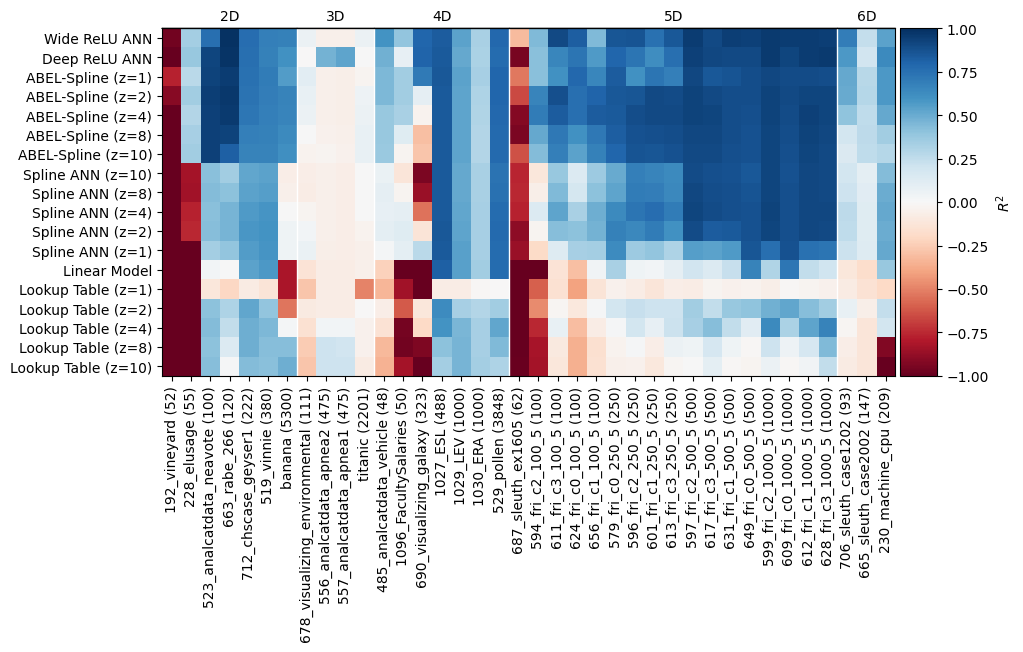

TypeError: 'NoneType' object is not subscriptable

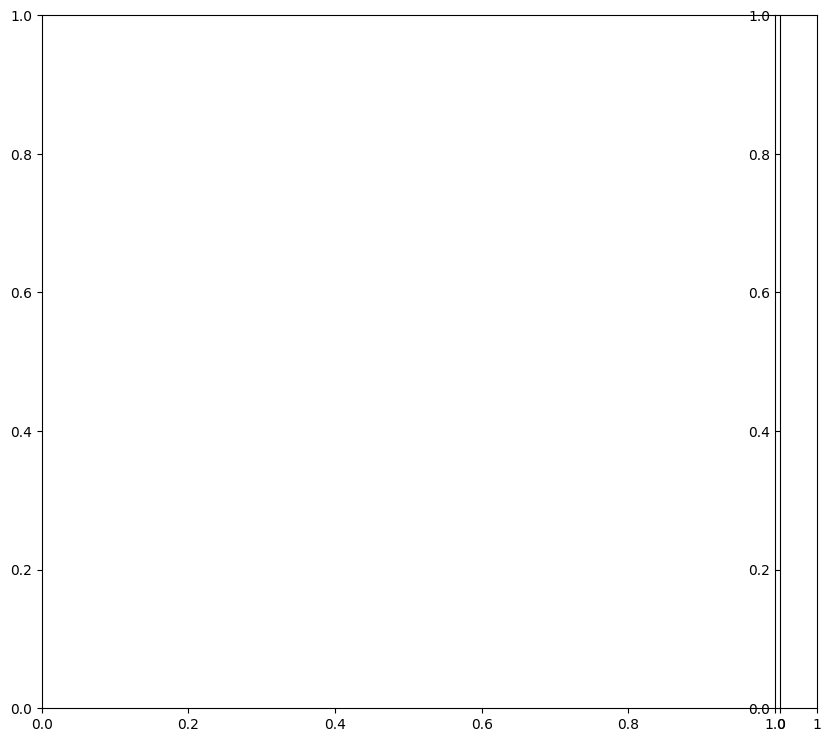

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Metrics labels dictionary
metrics_labels = {
    'loss': 'log MAE',
    'r_squared_value': '$R^2$',
    'test_error': 'log MSE'
}

def plot_metric(metric):
    instances_dict = filtered_datasets_metadata.set_index('dataset')['n_instances'].to_dict()
    features_dict = filtered_datasets_metadata.set_index('dataset')['n_features'].to_dict()

    unique_features_counts = sorted(list(set(features_dict.values())))

    sorted_dataset_names = []
    bracket_positions = {}

    for feature_count in unique_features_counts:
        datasets_with_feature_count = [dataset for dataset, features in features_dict.items() if features == feature_count]
        sorted_datasets = sorted(datasets_with_feature_count, key=lambda x: instances_dict[x])

        if not sorted_datasets:
            continue

        start_index = len(sorted_dataset_names)
        end_index = start_index + len(sorted_datasets) - 1

        bracket_positions[feature_count] = (start_index, end_index)
        
        sorted_dataset_names += [(dataset, instances_dict[dataset]) for dataset in sorted_datasets]

    data_array = np.zeros((len(model_names), len(sorted_dataset_names)))    

    mean_std_of_metric = calculate_mean_std_metric(metric)

    for i, model_name in enumerate(model_names):
        for j, (dataset_name, _) in enumerate(sorted_dataset_names):
            if model_name in mean_std_of_metric[dataset_name]:
                if metric == 'r_squared_value':
                    data_array[i, j] = mean_std_of_metric[dataset_name][model_name]['mean']
                else:
                    data_array[i, j] = np.log(mean_std_of_metric[dataset_name][model_name]['mean'])

    fig, ax = plt.subplots(figsize=(10, len(model_names)/2))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    cmap_choice = 'RdBu' if metric == 'r_squared_value' else 'viridis'
    
    # Set color limits for R^2
    clim=(-1, 1) if metric=='r_squared_value' else None

    im = ax.imshow(data_array, interpolation='nearest', cmap=cmap_choice, vmin=clim[0], vmax=clim[1])
    
    cbar = fig.colorbar(im, cax=cax, orientation="vertical")

    cbar.set_label(metrics_labels[metric], rotation=90) 

    ax.set_yticks(np.arange(len(model_names)))
    ax.set_yticklabels(model_names)

    ax.set_xticks(np.arange(len(sorted_dataset_names)))
    ax.set_xticklabels([f"{name} ({n_instances})" for name, n_instances in sorted_dataset_names], rotation=90)

    for feature_count, (start_index, end_index) in bracket_positions.items():
        ax.annotate("", xy=(start_index-0.5,-0.5), xycoords='data',
                      xytext=(end_index+0.5,-0.5), textcoords='data',
                      annotation_clip=False,
                      arrowprops=dict(arrowstyle="-",
                                      shrinkA=0, shrinkB=0,
                                      connectionstyle="angle3"))
        ax.text((start_index+end_index)/2, -1.5, f"{feature_count}D",
                  horizontalalignment='center', verticalalignment='top')

        if start_index > 0:
            ax.axvline(x=start_index-0.5, color='white', linewidth=1)

    #plt.savefig(f'{metric}.png', dpi=300, bbox_inches='tight')
    #plt.close(fig)  # close the figure
    # Show plot
    plt.show()

# Now you can call this function to plot different metrics
plot_metric('r_squared_value')
plot_metric('loss')
plot_metric('test_error')

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Metrics labels dictionary
metrics_labels = {
    'loss': 'log MAE',
    'r_squared_value': '$R^2$',
    'test_error': 'log MSE'
}

def plot_metric(metric):
    instances_dict = filtered_datasets_metadata.set_index('dataset')['n_instances'].to_dict()
    features_dict = filtered_datasets_metadata.set_index('dataset')['n_features'].to_dict()

    unique_features_counts = sorted(list(set(features_dict.values())))

    sorted_dataset_names = []
    bracket_positions = {}

    for feature_count in unique_features_counts:
        datasets_with_feature_count = [dataset for dataset, features in features_dict.items() if features == feature_count]
        sorted_datasets = sorted(datasets_with_feature_count, key=lambda x: instances_dict[x])

        if not sorted_datasets:
            continue

        start_index = len(sorted_dataset_names)
        end_index = start_index + len(sorted_datasets) - 1

        bracket_positions[feature_count] = (start_index, end_index)
        
        sorted_dataset_names += [(dataset, instances_dict[dataset]) for dataset in sorted_datasets]

    data_array = np.zeros((len(model_names), len(sorted_dataset_names)))    

    mean_std_of_metric = calculate_mean_std_metric(metric)

    for i, model_name in enumerate(model_names):
        for j, (dataset_name, _) in enumerate(sorted_dataset_names):
            if model_name in mean_std_of_metric[dataset_name]:
                if metric == 'r_squared_value':
                    data_array[i, j] = mean_std_of_metric[dataset_name][model_name]['mean']
                else:
                    data_array[i, j] = np.log(mean_std_of_metric[dataset_name][model_name]['mean'])

    fig, ax = plt.subplots(figsize=(10, len(model_names)/2))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    cmap_choice = 'RdYlBu' if metric == 'r_squared_value' else 'viridis'

    # Set color limits for R^2
    clim=(-1, 1) if metric=='r_squared_value' else None

    if clim:
        im = ax.imshow(data_array, interpolation='nearest', cmap=cmap_choice, vmin=clim[0], vmax=clim[1])
    else:
        im = ax.imshow(data_array, interpolation='nearest', cmap=cmap_choice)
        
    cbar = fig.colorbar(im, cax=cax, orientation="vertical")

    cbar.set_label(metrics_labels[metric], rotation=90) 

    ax.set_yticks(np.arange(len(model_names)))
    ax.set_yticklabels(model_names)

    ax.set_xticks(np.arange(len(sorted_dataset_names)))
    ax.set_xticklabels([f"{name} ({n_instances})" for name, n_instances in sorted_dataset_names], rotation=90)

    for feature_count, (start_index, end_index) in bracket_positions.items():
        ax.annotate("", xy=(start_index-0.5,-0.5), xycoords='data',
                      xytext=(end_index+0.5,-0.5), textcoords='data',
                      annotation_clip=False,
                      arrowprops=dict(arrowstyle="-",
                                      shrinkA=0, shrinkB=0,
                                      connectionstyle="angle3"))
        ax.text((start_index+end_index)/2, -1.5, f"{feature_count}D",
                  horizontalalignment='center', verticalalignment='top')

        if start_index > 0:
            ax.axvline(x=start_index-0.5, color='white', linewidth=1)

    #plt.savefig(f'{metric}.png', dpi=300, bbox_inches='tight')
    #plt.close(fig)  # close the figure
    plt.savefig(f'{metric}.png', dpi=300, bbox_inches='tight')
    plt.close(fig)  # close the figure
    # Show plot
    #plt.show()

# Now you can call this function to plot different metrics
plot_metric('r_squared_value')
plot_metric('loss')
plot_metric('test_error')

In [49]:
data['663_rabe_266']['Wide ReLU ANN']['1']['r_squared_value']

0.9338134373108029

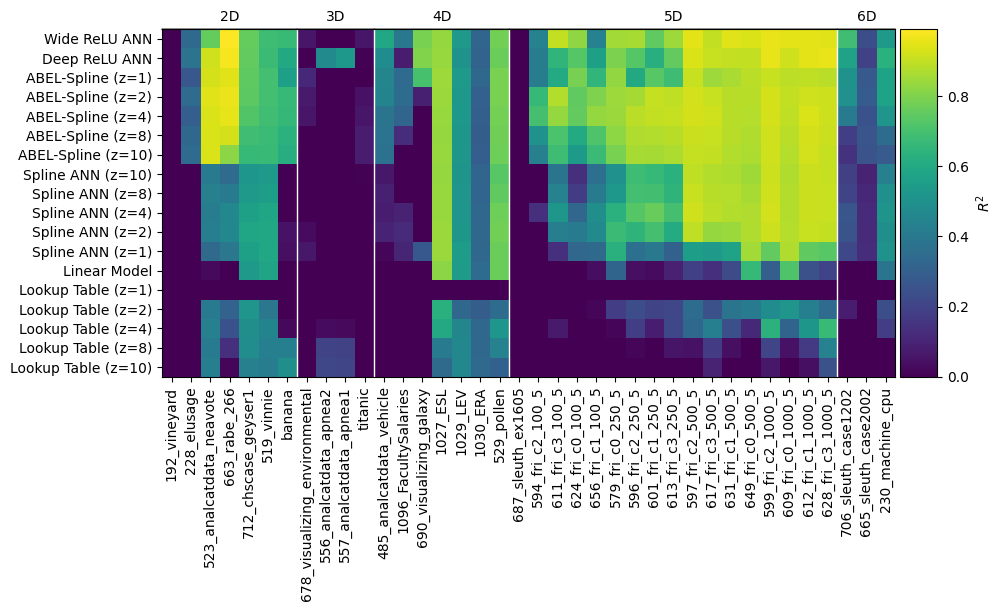

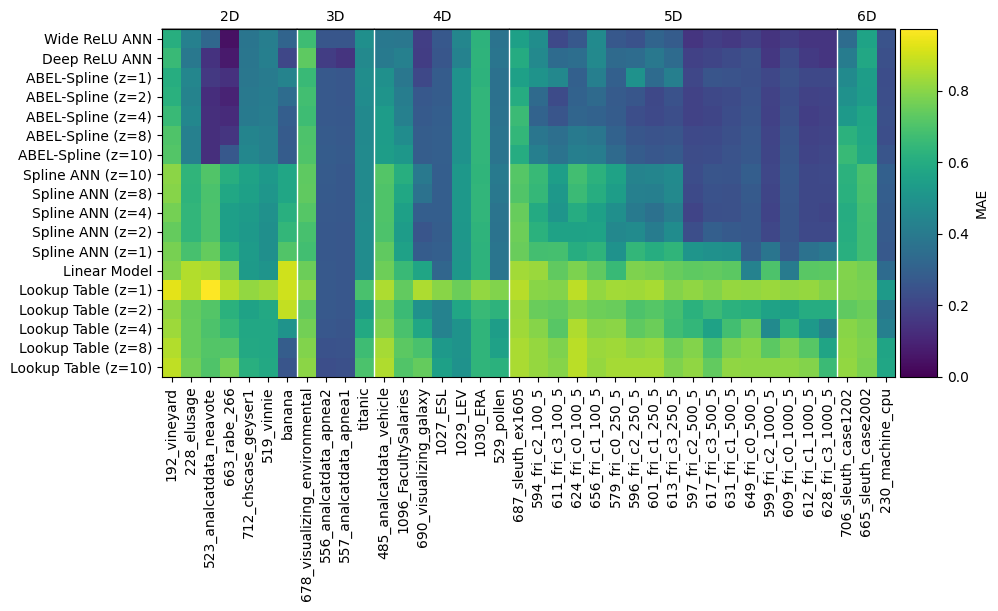

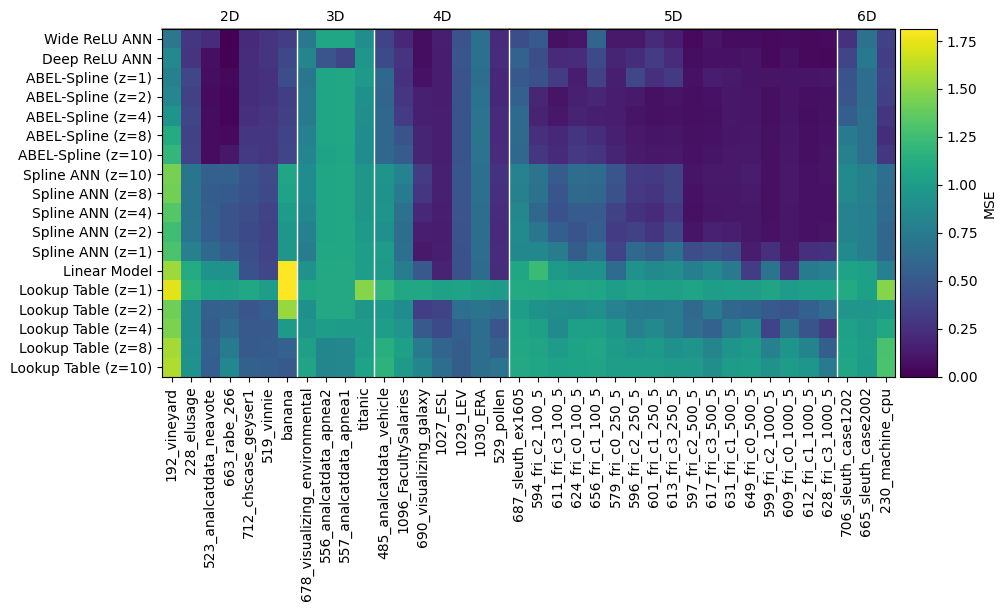

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Metrics labels dictionary
metrics_labels = {
    'loss': 'MAE',
    'r_squared_value': '$R^2$',
    'test_error': 'MSE'
}

def plot_metric(metric):
    # Create dictionaries mapping dataset names to number of instances and number of features
    instances_dict = filtered_datasets_metadata.set_index('dataset')['n_instances'].to_dict()
    features_dict = filtered_datasets_metadata.set_index('dataset')['n_features'].to_dict()

    # Get all unique feature counts
    unique_features_counts = sorted(list(set(features_dict.values())))

    # Initialize list and dictionary to hold sorted dataset names and their indices for bracket positioning
    sorted_dataset_names = []
    bracket_positions = {}

     # Iterate over feature counts
    for feature_count in unique_features_counts:
         # Get datasets with current feature count and sort them based on number of instances
        datasets_with_feature_count = [dataset for dataset, features in features_dict.items() if features == feature_count]
        sorted_datasets = sorted(datasets_with_feature_count, key=lambda x: instances_dict[x])

        if not sorted_datasets:
            continue
        
         # Add to list of sorted dataset names and store their indices in the dictionary for bracket positioning
        start_index = len(sorted_dataset_names)
        end_index = start_index + len(sorted_datasets) - 1

        bracket_positions[feature_count] = (start_index, end_index)
        
        sorted_dataset_names += sorted_datasets
    
     # Initialize 2D numpy array to hold data (r_squared value mean for this example)
    data_array = np.zeros((len(model_names), len(sorted_dataset_names)))    

    mean_std_of_metric = calculate_mean_std_metric(metric)

     # Fill data array with metric means
    for i, model_name in enumerate(model_names):
        for j, dataset_name in enumerate(sorted_dataset_names):
            if model_name in mean_std_of_metric[dataset_name]:
                data_array[i, j] = mean_std_of_metric[dataset_name][model_name]['mean']

     # Create 2D imshow plot with colorbar
    fig, ax = plt.subplots(figsize=(10, len(model_names)/2))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    im = ax.imshow(data_array, interpolation='nearest', cmap='viridis', vmin=0)   # set vmin to 0
    cbar = fig.colorbar(im, cax=cax, orientation="vertical")

      # Add label to colorbar using metrics labels dictionary
    cbar.set_label(metrics_labels[metric], rotation=90) 

      # Set model names as y tick labels
    ax.set_yticks(np.arange(len(model_names)))
    ax.set_yticklabels(model_names)

       # Set sorted dataset names as x tick labels, rotated 90 degrees for better readability
    ax.set_xticks(np.arange(len(sorted_dataset_names)))
    ax.set_xticklabels(sorted_dataset_names, rotation=90)

       # Add brackets and labels indicating feature counts
    for feature_count, (start_index, end_index) in bracket_positions.items():
        ax.annotate("", xy=(start_index-0.5,-0.5), xycoords='data',
                      xytext=(end_index+0.5,-0.5), textcoords='data',
                      annotation_clip=False,
                      arrowprops=dict(arrowstyle="-",
                                      shrinkA=0, shrinkB=0,
                                      connectionstyle="angle3"))
        ax.text((start_index+end_index)/2, -1.5, f"{feature_count}D",
                  horizontalalignment='center', verticalalignment='top')

        # Draw vertical white lines at the boundary between datasets with different feature counts
        if start_index > 0:
            ax.axvline(x=start_index-0.5, color='white', linewidth=1)

    #plt.savefig(f'{metric}.png', dpi=300, bbox_inches='tight')
    #plt.close(fig)  # close the figure
    # Show plot
    plt.show()

# Now you can call this function to plot different metrics
plot_metric('r_squared_value')
plot_metric('loss')
plot_metric('test_error')

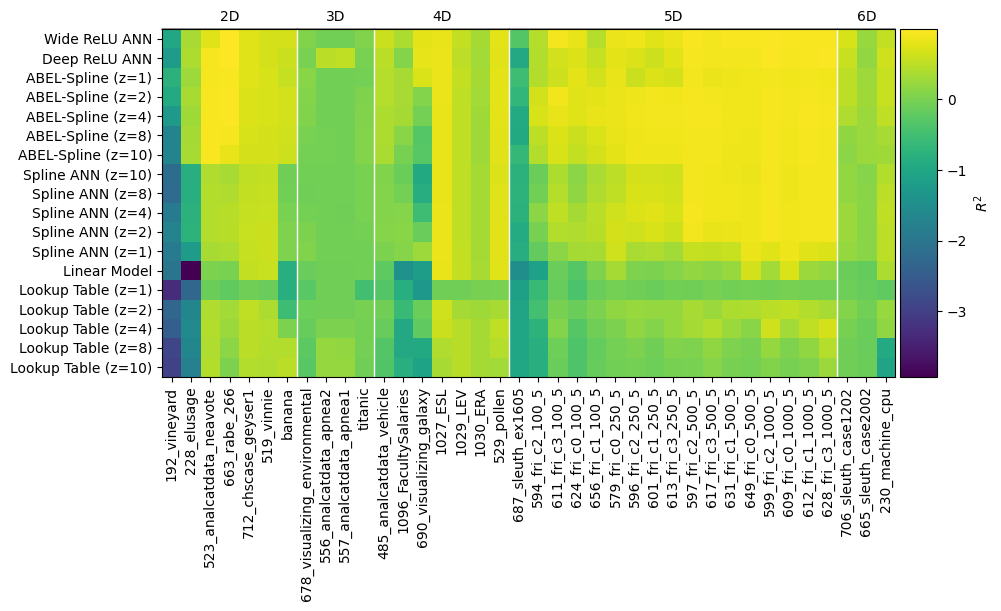

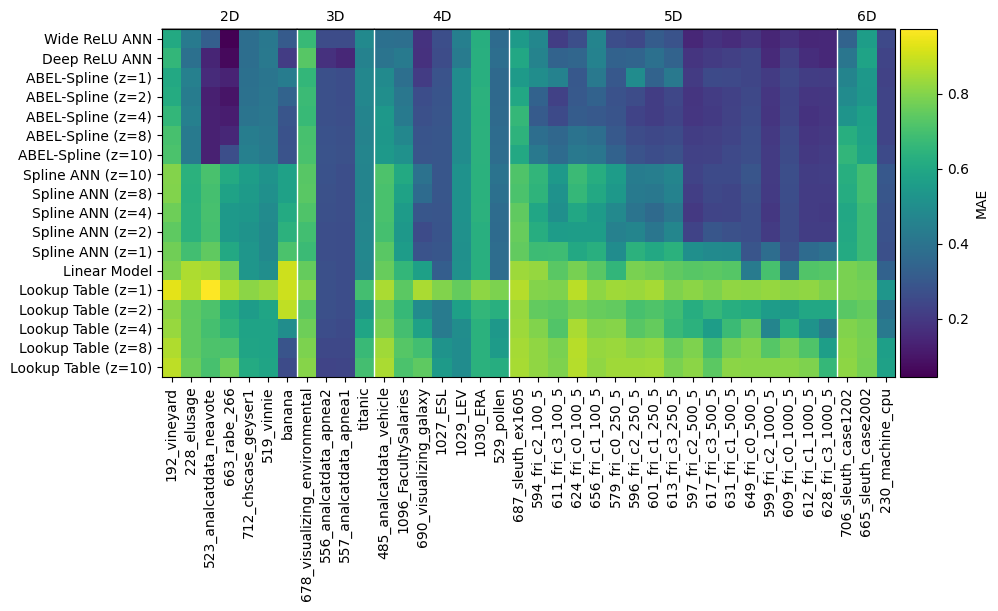

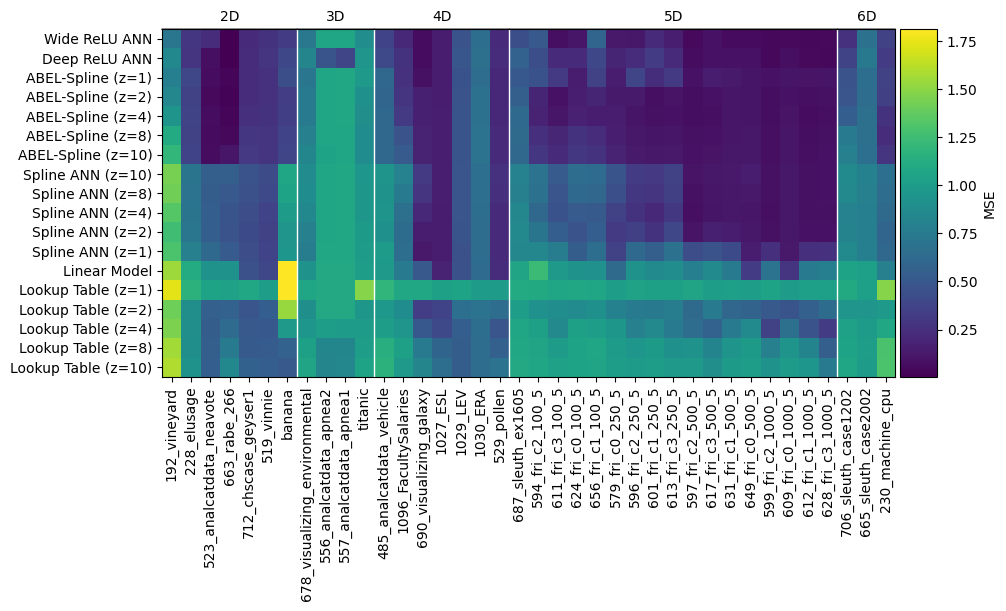

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Metrics labels dictionary
metrics_labels = {
    'loss': 'MAE',
    'r_squared_value': '$R^2$',
    'test_error': 'MSE'
}

def plot_metric(metric):
    # Create dictionaries mapping dataset names to number of instances and number of features
    instances_dict = filtered_datasets_metadata.set_index('dataset')['n_instances'].to_dict()
    features_dict = filtered_datasets_metadata.set_index('dataset')['n_features'].to_dict()

    # Get all unique feature counts
    unique_features_counts = sorted(list(set(features_dict.values())))

    # Initialize list and dictionary to hold sorted dataset names and their indices for bracket positioning
    sorted_dataset_names = []
    bracket_positions = {}

     # Iterate over feature counts
    for feature_count in unique_features_counts:
         # Get datasets with current feature count and sort them based on number of instances
        datasets_with_feature_count = [dataset for dataset, features in features_dict.items() if features == feature_count]
        sorted_datasets = sorted(datasets_with_feature_count, key=lambda x: instances_dict[x])

        if not sorted_datasets:
            continue
        
         # Add to list of sorted dataset names and store their indices in the dictionary for bracket positioning
        start_index = len(sorted_dataset_names)
        end_index = start_index + len(sorted_datasets) - 1

        bracket_positions[feature_count] = (start_index, end_index)
        
        sorted_dataset_names += sorted_datasets
    
     # Initialize 2D numpy array to hold data (r_squared value mean for this example)
    data_array = np.zeros((len(model_names), len(sorted_dataset_names)))    

    mean_std_of_metric = calculate_mean_std_metric(metric)

     # Fill data array with metric means
    for i, model_name in enumerate(model_names):
        for j, dataset_name in enumerate(sorted_dataset_names):
            if model_name in mean_std_of_metric[dataset_name]:
                data_array[i, j] = mean_std_of_metric[dataset_name][model_name]['mean']

     # Create 2D imshow plot with colorbar
    fig, ax = plt.subplots(figsize=(10, len(model_names)/2))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    im = ax.imshow(data_array, interpolation='nearest', cmap='viridis')
    cbar = fig.colorbar(im, cax=cax, orientation="vertical")

      # Add label to colorbar using metrics labels dictionary
    cbar.set_label(metrics_labels[metric], rotation=90) 

      # Set model names as y tick labels
    ax.set_yticks(np.arange(len(model_names)))
    ax.set_yticklabels(model_names)

       # Set sorted dataset names as x tick labels, rotated 90 degrees for better readability
    ax.set_xticks(np.arange(len(sorted_dataset_names)))
    ax.set_xticklabels(sorted_dataset_names, rotation=90)

       # Add brackets and labels indicating feature counts
    for feature_count, (start_index, end_index) in bracket_positions.items():
        ax.annotate("", xy=(start_index-0.5,-0.5), xycoords='data',
                      xytext=(end_index+0.5,-0.5), textcoords='data',
                      annotation_clip=False,
                      arrowprops=dict(arrowstyle="-",
                                      shrinkA=0, shrinkB=0,
                                      connectionstyle="angle3"))
        ax.text((start_index+end_index)/2, -1.5, f"{feature_count}D",
                  horizontalalignment='center', verticalalignment='top')

        # Draw vertical white lines at the boundary between datasets with different feature counts
        if start_index > 0:
            ax.axvline(x=start_index-0.5, color='white', linewidth=1)

    # Show plot
    plt.show()

# Now you can call this function to plot different metrics
plot_metric('r_squared_value')
plot_metric('loss')
plot_metric('test_error')

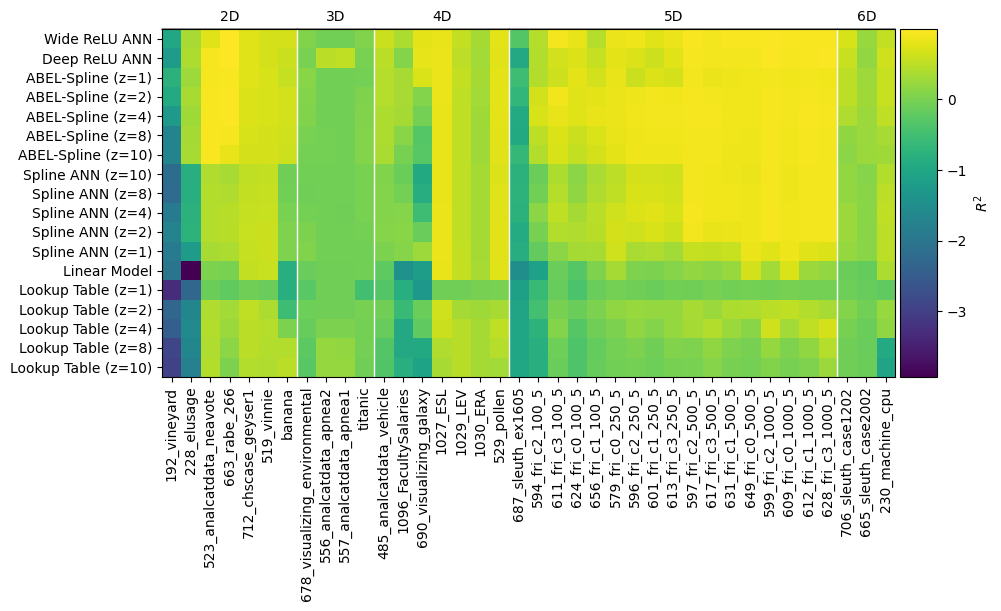

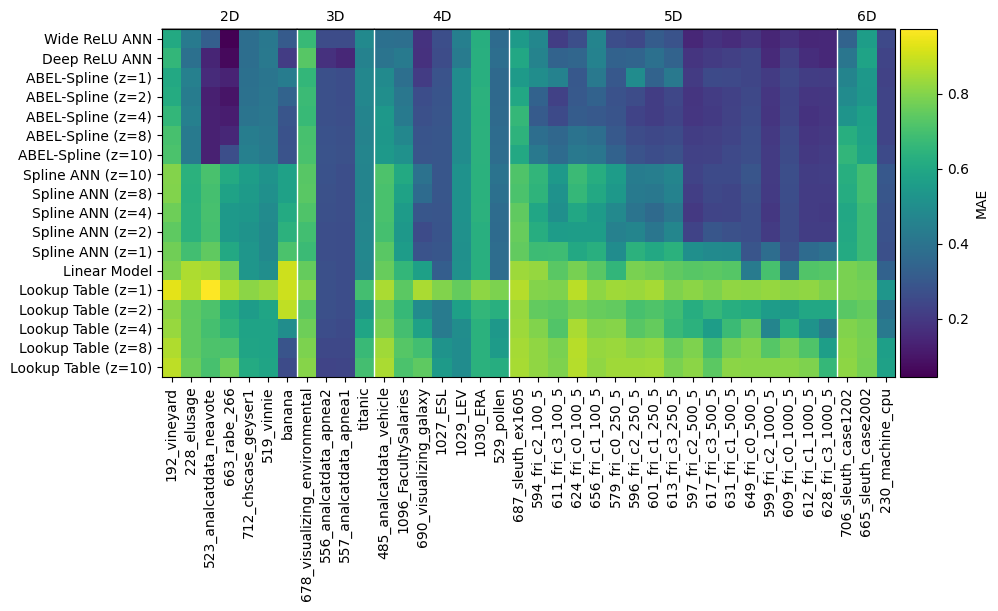

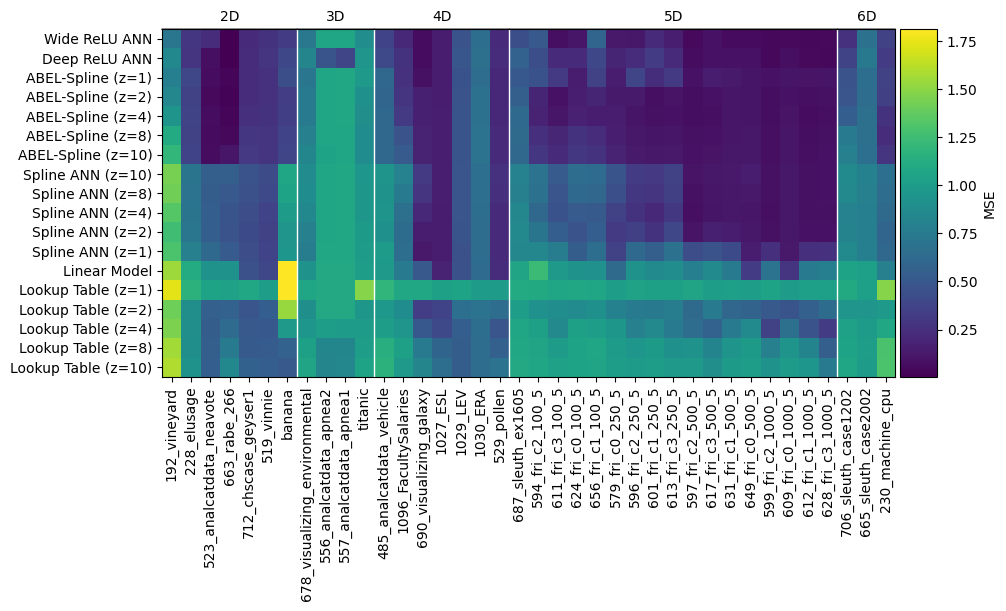

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Metrics labels dictionary
metrics_labels = {
    'loss': 'MAE',
    'r_squared_value': '$R^2$',
    'test_error': 'MSE'
}

def plot_metric(metric):
    # Create dictionaries mapping dataset names to number of instances and number of features
    instances_dict = filtered_datasets_metadata.set_index('dataset')['n_instances'].to_dict()
    features_dict = filtered_datasets_metadata.set_index('dataset')['n_features'].to_dict()

    # Get all unique feature counts
    unique_features_counts = sorted(list(set(features_dict.values())))

    # Initialize list and dictionary to hold sorted dataset names and their indices for bracket positioning
    sorted_dataset_names = []
    bracket_positions = {}

     # Iterate over feature counts
    for feature_count in unique_features_counts:
         # Get datasets with current feature count and sort them based on number of instances
        datasets_with_feature_count = [dataset for dataset, features in features_dict.items() if features == feature_count]
        sorted_datasets = sorted(datasets_with_feature_count, key=lambda x: instances_dict[x])

        if not sorted_datasets:
            continue
        
         # Add to list of sorted dataset names and store their indices in the dictionary for bracket positioning
        start_index = len(sorted_dataset_names)
        end_index = start_index + len(sorted_datasets) - 1

        bracket_positions[feature_count] = (start_index, end_index)
        
        sorted_dataset_names += sorted_datasets
    
     # Initialize 2D numpy array to hold data (r_squared value mean for this example)
    data_array = np.zeros((len(model_names), len(sorted_dataset_names)))    

    mean_std_of_metric = calculate_mean_std_metric(metric)

     # Fill data array with metric means
    for i, model_name in enumerate(model_names):
        for j, dataset_name in enumerate(sorted_dataset_names):
            if model_name in mean_std_of_metric[dataset_name]:
                data_array[i, j] = mean_std_of_metric[dataset_name][model_name]['mean']

     # Create 2D imshow plot with colorbar
    fig, ax = plt.subplots(figsize=(10, len(model_names)/2))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    im = ax.imshow(data_array, interpolation='nearest', cmap='viridis')
    cbar = fig.colorbar(im, cax=cax, orientation="vertical")

      # Add label to colorbar using metrics labels dictionary
    cbar.set_label(metrics_labels[metric], rotation=90) 

      # Set model names as y tick labels
    ax.set_yticks(np.arange(len(model_names)))
    ax.set_yticklabels(model_names)

       # Set sorted dataset names as x tick labels, rotated 90 degrees for better readability
    ax.set_xticks(np.arange(len(sorted_dataset_names)))
    ax.set_xticklabels(sorted_dataset_names, rotation=90)

       # Add brackets and labels indicating feature counts
    for feature_count, (start_index, end_index) in bracket_positions.items():
        ax.annotate("", xy=(start_index-0.5,-0.5), xycoords='data',
                      xytext=(end_index+0.5,-0.5), textcoords='data',
                      annotation_clip=False,
                      arrowprops=dict(arrowstyle="-",
                                      shrinkA=0, shrinkB=0,
                                      connectionstyle="angle3"))
        ax.text((start_index+end_index)/2, -1.5, f"{feature_count}D",
                  horizontalalignment='center', verticalalignment='top')

        # Draw vertical white lines at the boundary between datasets with different feature counts
        if start_index > 0:
            ax.axvline(x=start_index-0.5, color='white', linewidth=1)

    # Show plot
    plt.show()

# Now you can call this function to plot different metrics
plot_metric('r_squared_value')
plot_metric('loss')
plot_metric('test_error')

TypeError: cannot unpack non-iterable int object

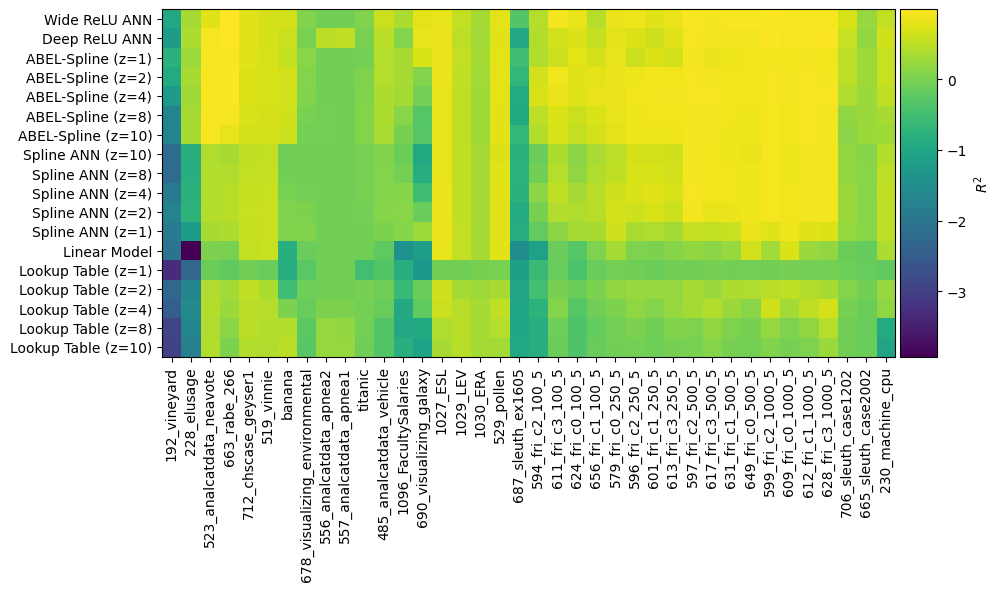

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Metrics labels dictionary
metrics_labels = {
    'loss': 'MAE',
    'r_squared_value': '$R^2$',
    'test_error': 'MSE'
}

def plot_metric(metric):
    # Create dictionaries mapping dataset names to number of instances and number of features
    instances_dict = filtered_datasets_metadata.set_index('dataset')['n_instances'].to_dict()
    features_dict = filtered_datasets_metadata.set_index('dataset')['n_features'].to_dict()

    # Get all unique feature counts
    unique_features_counts = sorted(list(set(features_dict.values())))

    # Initialize list and dictionary to hold sorted dataset names and their indices for bracket positioning
    sorted_dataset_names = []
    bracket_positions = {}

    # Iterate over feature counts
    for feature_count in unique_features_counts:
        # Get datasets with current feature count and sort them based on number of instances
        datasets_with_feature_count = [dataset for dataset, features in features_dict.items() if features == feature_count]
        sorted_datasets = sorted(datasets_with_feature_count, key=lambda x: instances_dict[x])

        if not sorted_datasets:
            continue
        
        # Add to list of sorted dataset names and store their indices in the dictionary for bracket positioning
        start_index = len(sorted_dataset_names)
        end_index = start_index + len(sorted_datasets) - 1

        bracket_positions[feature_count] = (start_index, end_index)
        
        sorted_dataset_names += sorted_datasets
    
     # Initialize 2D numpy array to hold data (r_squared value mean for this example)
    data_array = np.zeros((len(model_names), len(sorted_dataset_names)))    

    mean_std_of_metric = calculate_mean_std_metric(metric)

    # Fill data array with metric means
    for i, model_name in enumerate(model_names):
        for j, dataset_name in enumerate(sorted_dataset_names):
            if model_name in mean_std_of_metric[dataset_name]:
                data_array[i, j] = mean_std_of_metric[dataset_name][model_name]['mean']

    # Create 2D imshow plot with colorbar
    fig, ax = plt.subplots(figsize=(10, len(model_names)/2))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    im = ax.imshow(data_array, interpolation='nearest', cmap='viridis')
    cbar = fig.colorbar(im, cax=cax, orientation="vertical")

     # Add label to colorbar using metrics labels dictionary
    cbar.set_label(metrics_labels[metric], rotation=90) 

     # Set model names as y tick labels
    ax.set_yticks(np.arange(len(model_names)))
    ax.set_yticklabels(model_names)

      # Set sorted dataset names as x tick labels, rotated 90 degrees for better readability
    ax.set_xticks(np.arange(len(sorted_dataset_names)))
    ax.set_xticklabels(sorted_dataset_names, rotation=90)

      # Draw a thin vertical white line at the boundary between two pixels/columns that correspond to different feature dimensions.
    for _, (start_index, end_index) in bracket_positions.values():
        if end_index < len(sorted_dataset_names) - 1:  # Avoid index out of range error.
            ax.axvline(x=end_index + 0.5, color='white', linewidth=1)
              
      # Show plot
    plt.show()

# Now you can call this function to plot different metrics
plot_metric('r_squared_value')
plot_metric('loss')
plot_metric('test_error')

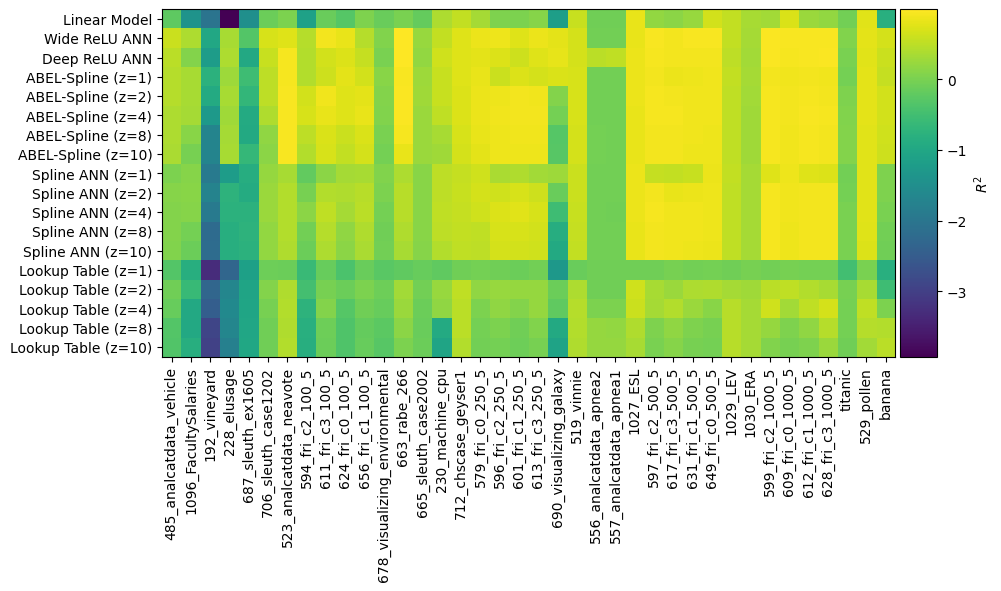

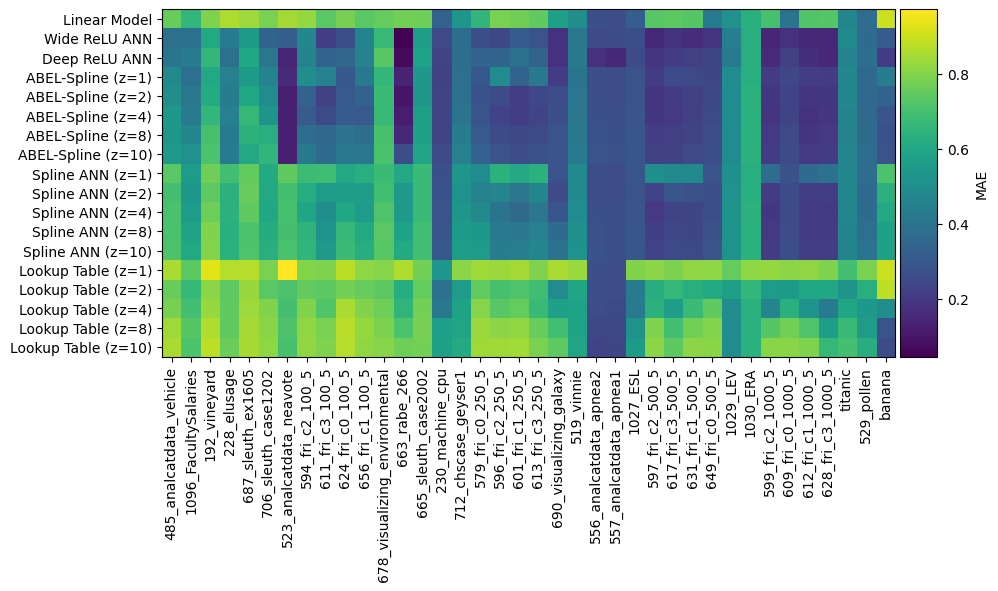

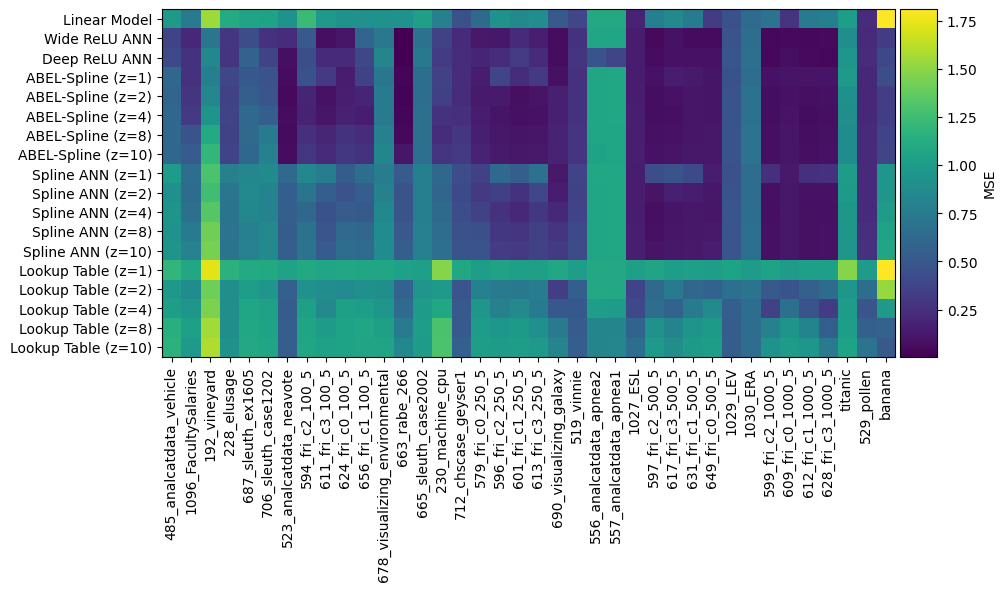

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Metrics labels dictionary
metrics_labels = {
    'loss': 'MAE',
    'r_squared_value': '$R^2$',
    'test_error': 'MSE'
}

def plot_metric(metric):
    # version that plots according to number of instances
    # Create a dictionary mapping dataset names to number of instances
    instances_dict = filtered_datasets_metadata.set_index('dataset')['n_instances'].to_dict()

    # Sort the dataset names based on number of instances
    sorted_dataset_names = sorted(data.keys(), key=lambda x: instances_dict[x])

    # Initialize 2D numpy array to hold data (r_squared value mean for this example)
    mean_std_of_metric = calculate_mean_std_metric(metric)

    # Initialize 2D numpy array to hold data
    data_array = np.zeros((len(model_names), len(sorted_dataset_names)))

    # Fill data array with metric means
    for i, model_name in enumerate(model_names):
        for j, dataset_name in enumerate(sorted_dataset_names):
            if model_name in mean_std_of_metric[dataset_name]:
                data_array[i, j] = mean_std_of_metric[dataset_name][model_name]['mean']

    # Create 2D imshow plot with colorbar
    fig, ax = plt.subplots(figsize=(10, len(model_names)/2))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    
     # Add label to colorbar using metrics labels dictionary
    im = ax.imshow(data_array, interpolation='nearest', cmap='viridis')
    
     # Add label to colorbar using metrics labels dictionary
    cbar = fig.colorbar(im, cax=cax, orientation="vertical")
   
    # Add label to colorbar using metrics labels dictionary
    cbar.set_label(metrics_labels[metric], rotation=90) 

    # Set model names as y tick labels
    ax.set_yticks(np.arange(len(model_names)))
    ax.set_yticklabels(model_names)

     # Set sorted dataset names as x tick labels, rotated 90 degrees for better readability
    ax.set_xticks(np.arange(len(sorted_dataset_names)))
    
     # Set sorted dataset names as x tick labels, rotated 90 degrees for better readability
    ax.set_xticklabels(sorted_dataset_names, rotation=90)

    # Show plot
    plt.show()

# Now you can call this function to plot different metrics
plot_metric('r_squared_value')
plot_metric('loss')
plot_metric('test_error')